# **Project Introduction:**

The primary objective is to streamline marketing expenditure of Yandex.Afisha

**Project Scope:**

This project involves analyzing three core datasets:

1. **Server Logs:** These logs span June 2017 to May 2018 and offer insights into user behavior.

2. **Orders Data:** This dataset covers all orders during the same period, providing a view of customer purchase patterns.

3. **Marketing Expenses Statistics:** This dataset outlines marketing costs, enabling an assessment of channel effectiveness.

**Key Focus Areas:**

The analysis aims to address key questions for optimizing marketing expenses:

**User Behavior:**
- User engagement on daily, weekly, and monthly scales.
- Session metrics such as daily counts and duration.
- User retention rates and trends.

**Sales and Conversion:**
- Transition times from visitor to customer.
- Average order counts and purchase values over defined timeframes.
- Customer Lifetime Value (LTV) analysis.

**Marketing Expenses and ROI:**
- Comprehensive marketing cost analysis by source and time.
- Calculation of customer acquisition costs.
- Evaluation of ROI for marketing investments.

This analysis will employ effective visualizations to illustrate these metrics, facilitating data-backed recommendations for marketing experts. The project will be presented in a structured Jupyter Notebook, encompassing code cells and explanatory text with suitable formatting.

The objective is to optimize marketing expenses and offer actionable recommendations for Yandex.Afisha, ensuring a valuable, data-driven journey.

## Downloading data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import itertools
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pio.renderers.default = 'notebook'

In [3]:
# download visits data
visits = pd.read_csv('data/visits_log_us.csv', 
                     dtype={'Device': 'category', 'Source Id': 'int8'},
                     parse_dates=['End Ts', 'Start Ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int8          
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int8(1), uint64(1)
memory usage: 8.9 MB


In [3]:
# rename to snake_case
visits.columns = visits.columns.str.lower().str.replace(' ','_')

In [4]:
visits

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       16174680259334210214  
4        9969694820036681168  
...                      ...  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559  

[359400 rows x 5 columns]

In [5]:
# download orders data
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [6]:
# rename to snake_case
orders.columns = orders.columns.str.lower().str.replace(' ','_')

In [7]:
orders

buy_ts  revenue                   uid
0     2017-06-01 00:10:00    17.00  10329302124590727494
1     2017-06-01 00:25:00     0.55  11627257723692907447
2     2017-06-01 00:27:00     0.37  17903680561304213844
3     2017-06-01 00:29:00     0.55  16109239769442553005
4     2017-06-01 07:58:00     0.37  14200605875248379450
...                   ...      ...                   ...
50410 2018-05-31 23:50:00     4.64  12296626599487328624
50411 2018-05-31 23:50:00     5.80  11369640365507475976
50412 2018-05-31 23:54:00     0.30   1786462140797698849
50413 2018-05-31 23:56:00     3.67   3993697860786194247
50414 2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]

In [8]:
# download costs data
costs = pd.read_csv('/datasets/costs_us.csv',
                    dtype={'source_id': 'int8'},
                    parse_dates=['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int8          
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int8(1)
memory usage: 42.3 KB


In [9]:
costs

source_id         dt  costs
0             1 2017-06-01  75.20
1             1 2017-06-02  62.25
2             1 2017-06-03  36.53
3             1 2017-06-04  55.00
4             1 2017-06-05  57.08
...         ...        ...    ...
2537         10 2018-05-27   9.92
2538         10 2018-05-28  21.26
2539         10 2018-05-29  11.32
2540         10 2018-05-30  33.15
2541         10 2018-05-31  17.60

[2542 rows x 3 columns]

## Basic preprocessing and cleaning

### Missing and duplicate values

In [10]:
# doublecheck for missing values
display(visits.isna().sum(),
        orders.isna().sum(),
        costs.isna().sum()
       )

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

buy_ts     0
revenue    0
uid        0
dtype: int64

source_id    0
dt           0
costs        0
dtype: int64

**Result:** no missing values

In [11]:
# obvious duplicates
display(visits.duplicated().sum(),
        orders.duplicated().sum(),
        costs.duplicated().sum()
       )

0

0

0

**Result:** no full duplicates

In [12]:
# check if user can have several sessions at the same time
display(visits.duplicated(subset=['uid', 'start_ts']).sum())
visits[visits.duplicated(subset=['uid', 'start_ts'], keep=False)]

1

device              end_ts  source_id            start_ts  \
44993  touch 2018-03-16 08:57:00          1 2018-03-16 08:55:00   
47067  touch 2018-03-16 08:55:00          1 2018-03-16 08:55:00   

                       uid  
44993  1981020429381477763  
47067  1981020429381477763

In [13]:
# duplicated orders
orders.duplicated(subset=['uid', 'buy_ts']).sum()

0

In [14]:
# doubled costs
costs.duplicated(subset=['source_id', 'dt']).sum()

0

**Result:** there is 1 session of zero duration that may seem duplicate. Taking into account the size of the dataset let's keep it. But we have to check if there are other 0-sec or weird sessions.

### Other logical checks

#### Time of visits

In [15]:
# sessions of zero duration
visits[visits['start_ts'] == visits['end_ts']]

device              end_ts  source_id            start_ts  \
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
28      desktop 2017-11-09 15:53:00          4 2017-11-09 15:53:00   
32      desktop 2017-11-30 12:29:00          4 2017-11-30 12:29:00   
54      desktop 2018-02-23 16:52:00         10 2018-02-23 16:52:00   
...         ...                 ...        ...                 ...   
358511  desktop 2017-09-15 11:31:00          4 2017-09-15 11:31:00   
358514  desktop 2018-01-16 23:57:00          5 2018-01-16 23:57:00   
358522  desktop 2017-11-08 13:39:00          4 2017-11-08 13:39:00   
358524    touch 2018-01-18 13:38:00          4 2018-01-18 13:38:00   
358529  desktop 2018-05-06 20:27:00          5 2018-05-06 20:27:00   

                         uid  
2        7459035603376831527  
4        9969694820036681168  
28      17892541477379911957  
32      13410401624913285510  
54      13423278602430425332  
...                      ...  
358511   6406595666419694649  
358514   6457848932283204350  
358522   6761309174945977743  
358524   4558073034499185861  
358529  13482259146982443019  

[35794 rows x 5 columns]

In [16]:
zero_dur_visits = visits[visits['start_ts'] == visits['end_ts']]
non_zero_dur_visits = visits[((visits['end_ts'] - visits['start_ts']) / pd.Timedelta(1, 'm')) >= 0.5]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=zero_dur_visits.groupby('source_id')['uid'].count().reset_index()['source_id'],
                     values=zero_dur_visits.groupby('source_id')['uid'].count().reset_index()['uid'],
             title='Zero-time visits'), 
              1, 1)
fig.add_trace(go.Pie(labels=non_zero_dur_visits.groupby('source_id')['uid'].count().reset_index()['source_id'],
                     values=non_zero_dur_visits.groupby('source_id')['uid'].count().reset_index()['uid'],
             title='Visits >= 30 sec'),
              1, 2)

fig.update_traces(hole=.4)
fig.update_layout(title_text="Share of visits by sources",
                  title_x = 0.5
                 )


fig.show()

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Good for you for visualizing your findings

**Note:** Sources 1 and 2 are expected to be more effective since sources 3, 4, and 5 generate a relatively higher proportion of zero-time visits.

In [17]:
((visits['end_ts'] - visits['start_ts']) / pd.Timedelta(1, 'm')) > 1

0          True
1          True
2         False
3          True
4         False
          ...  
359395    False
359396    False
359397    False
359398    False
359399    False
Length: 359400, dtype: bool

In [18]:
# sessions of negative duration
visits[visits['start_ts'] > visits['end_ts']]

device              end_ts  source_id            start_ts  \
4181    desktop 2018-03-25 03:18:00          3 2018-03-25 03:50:00   
177972  desktop 2018-03-25 03:09:00          9 2018-03-25 03:55:00   

                         uid  
4181    13092152539246794986  
177972   4621202742905035453

In [19]:
# drop sessions of negative duration
visits = visits.drop(visits[visits['start_ts'] > visits['end_ts']].index)
visits

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       16174680259334210214  
4        9969694820036681168  
...                      ...  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559  

[359398 rows x 5 columns]

**Result:** 
- almost 10% of sessions are of zero duration. Keep them in mind, especially sources 3,4,5.
- dropped 2 rows where end of the session was earlier than start thereof.

#### Data completeness -- dates

In [20]:
# create 'date' columns of visits to match with costs dataframe
visits['start_dt'] = pd.to_datetime(visits['start_ts'].dt.date)
visits['end_dt'] = pd.to_datetime(visits['end_ts'].dt.date)
visits

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
...         ...                 ...        ...                 ...   
359395  desktop 2017-07-29 19:07:19          2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid   start_dt     end_dt  
0       16879256277535980062 2017-12-20 2017-12-20  
1         104060357244891740 2018-02-19 2018-02-19  
2        7459035603376831527 2017-07-01 2017-07-01  
3       16174680259334210214 2018-05-20 2018-05-20  
4        9969694820036681168 2017-12-27 2017-12-27  
...                      ...        ...        ...  
359395  18363291481961487539 2017-07-29 2017-07-29  
359396  18370831553019119586 2018-01-25 2018-01-25  
359397  18387297585500748294 2018-03-03 2018-03-03  
359398  18388616944624776485 2017-11-02 2017-11-02  
359399  18396128934054549559 2017-09-10 2017-09-10  

[359398 rows x 7 columns]

In [21]:
orders['buy_dt'] = pd.to_datetime(orders['buy_ts'].dt.date)
orders

buy_ts  revenue                   uid     buy_dt
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01
...                   ...      ...                   ...        ...
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01

[50415 rows x 4 columns]

In [22]:
# check if all dates in 'visits' match all dates in 'costs' and in 'orders'
print('visits vs. costs:')
display(set(costs['dt']).difference(set(visits['start_dt'])))
display(set(costs['dt']).difference(set(visits['end_dt'])))
display(set(visits['start_dt']).difference(set(costs['dt'])))
display(set(visits['end_dt']).difference(set(costs['dt'])))

print('visits vs. orders:')
display(set(orders['buy_dt']).difference(set(visits['start_dt'])))
display(set(orders['buy_dt']).difference(set(visits['end_dt'])))
display(set(visits['start_dt']).difference(set(orders['buy_dt'])))
display(set(visits['end_dt']).difference(set(orders['buy_dt'])))

visits vs. costs:


set()

set()

set()

{Timestamp('2018-06-01 00:00:00')}

visits vs. orders:


{Timestamp('2018-06-01 00:00:00')}

set()

{Timestamp('2018-03-31 00:00:00')}

{Timestamp('2018-03-31 00:00:00')}

In [23]:
# Check if any dates are missing at all
date_range = pd.date_range(visits['start_dt'].min(), visits['end_dt'].max())
print('Dates w/o visits:', set(date_range) - set(pd.to_datetime(visits['start_dt'].unique())))
print('Dates w/o orders:', set(date_range) - set(pd.to_datetime(orders['buy_dt'].unique())))
print('Dates w/o costs:', set(date_range) - set(pd.to_datetime(costs['dt'].unique())))

Dates w/o visits: {Timestamp('2018-06-01 00:00:00', freq='D'), Timestamp('2018-04-01 00:00:00', freq='D')}
Dates w/o orders: {Timestamp('2018-03-31 00:00:00', freq='D'), Timestamp('2018-04-01 00:00:00', freq='D')}
Dates w/o costs: {Timestamp('2018-06-01 00:00:00', freq='D'), Timestamp('2018-04-01 00:00:00', freq='D')}


In [24]:
visits[visits['start_dt'] == datetime.datetime(2018,3,31)]

device              end_ts  source_id            start_ts  \
38065  desktop 2018-03-31 14:25:00          1 2018-03-31 14:24:00   

                       uid   start_dt     end_dt  
38065  7789160382257434989 2018-03-31 2018-03-31

**Result:** 
- looks like there were some troubles with data on March 31, 2018 and April 1. Only 1 visit and and no orders. Why? Should be addressed by the data provider.
- it's ok with '2018-06-01' as it's the last date of the dataset where end of sessions and final orders are shown
- let's keep it as is

Text(0, 0.5, 'Number of orders')

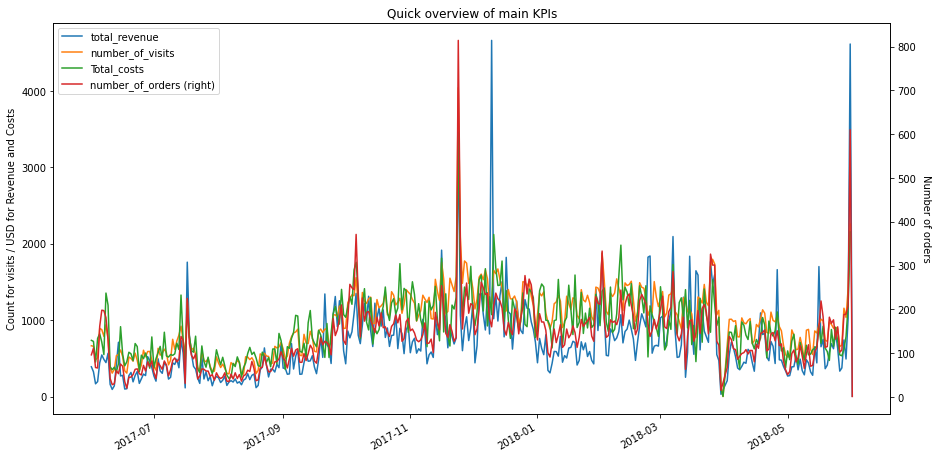

In [25]:
ax=orders.groupby('buy_dt').agg(total_revenue=('revenue', 'sum')).plot.line(figsize=(15,8))
visits.groupby('start_dt').agg(number_of_visits=('uid', 'count')).plot.line(ax=ax)
costs.groupby('dt').agg(Total_costs=('costs', 'sum')).plot.line(ax=ax)
ax2=orders.groupby('buy_dt').agg(number_of_orders = ('uid', 'count')).plot.line(secondary_y=True, ax=ax)
plt.title('Quick overview of main KPIs')
ax.set_ylabel('Count for visits / USD for Revenue and Costs')
ax.set_xlabel(None)
ax2.set_ylabel('Number of orders',rotation=270, labelpad=15)

#### Data completeness -- dates and sources

In [26]:
# check if all dates+sources in 'visits' match all dates+sources in 'costs'
display((set(visits.groupby(['start_dt', 'source_id']).groups)).difference(set(costs.groupby(['dt', 'source_id']).groups)))
display((set(visits.groupby(['end_dt', 'source_id']).groups)).difference(set(costs.groupby(['dt', 'source_id']).groups)))
display((set(costs.groupby(['dt', 'source_id']).groups)).difference(set(visits.groupby(['start_dt', 'source_id']).groups)))
display((set(costs.groupby(['dt', 'source_id']).groups)).difference(set(visits.groupby(['end_dt', 'source_id']).groups)))

{(Timestamp('2017-06-06 00:00:00'), 7),
 (Timestamp('2017-06-19 00:00:00'), 7),
 (Timestamp('2017-07-01 00:00:00'), 6),
 (Timestamp('2017-07-05 00:00:00'), 7),
 (Timestamp('2017-07-29 00:00:00'), 7),
 (Timestamp('2017-08-17 00:00:00'), 7),
 (Timestamp('2017-08-28 00:00:00'), 6),
 (Timestamp('2017-09-05 00:00:00'), 6),
 (Timestamp('2017-09-22 00:00:00'), 7),
 (Timestamp('2017-09-28 00:00:00'), 7),
 (Timestamp('2017-10-02 00:00:00'), 7),
 (Timestamp('2017-10-06 00:00:00'), 7),
 (Timestamp('2017-10-14 00:00:00'), 7),
 (Timestamp('2017-10-18 00:00:00'), 7),
 (Timestamp('2017-10-26 00:00:00'), 7),
 (Timestamp('2017-11-08 00:00:00'), 7),
 (Timestamp('2017-11-12 00:00:00'), 6),
 (Timestamp('2017-12-01 00:00:00'), 7),
 (Timestamp('2017-12-02 00:00:00'), 7),
 (Timestamp('2017-12-03 00:00:00'), 7),
 (Timestamp('2017-12-04 00:00:00'), 7),
 (Timestamp('2017-12-06 00:00:00'), 7),
 (Timestamp('2017-12-07 00:00:00'), 7),
 (Timestamp('2017-12-22 00:00:00'), 7),
 (Timestamp('2017-12-25 00:00:00'), 7),


{(Timestamp('2017-06-06 00:00:00'), 7),
 (Timestamp('2017-06-19 00:00:00'), 7),
 (Timestamp('2017-07-01 00:00:00'), 6),
 (Timestamp('2017-07-05 00:00:00'), 7),
 (Timestamp('2017-07-29 00:00:00'), 7),
 (Timestamp('2017-08-17 00:00:00'), 7),
 (Timestamp('2017-08-28 00:00:00'), 6),
 (Timestamp('2017-09-05 00:00:00'), 6),
 (Timestamp('2017-09-22 00:00:00'), 7),
 (Timestamp('2017-09-28 00:00:00'), 7),
 (Timestamp('2017-10-02 00:00:00'), 7),
 (Timestamp('2017-10-06 00:00:00'), 7),
 (Timestamp('2017-10-14 00:00:00'), 7),
 (Timestamp('2017-10-18 00:00:00'), 7),
 (Timestamp('2017-10-26 00:00:00'), 7),
 (Timestamp('2017-11-08 00:00:00'), 7),
 (Timestamp('2017-11-12 00:00:00'), 6),
 (Timestamp('2017-12-01 00:00:00'), 7),
 (Timestamp('2017-12-02 00:00:00'), 7),
 (Timestamp('2017-12-03 00:00:00'), 7),
 (Timestamp('2017-12-04 00:00:00'), 7),
 (Timestamp('2017-12-06 00:00:00'), 7),
 (Timestamp('2017-12-07 00:00:00'), 7),
 (Timestamp('2017-12-22 00:00:00'), 7),
 (Timestamp('2017-12-25 00:00:00'), 7),


{(Timestamp('2018-03-31 00:00:00'), 5)}

{(Timestamp('2018-03-31 00:00:00'), 5)}

In [27]:
# let's check if any costs from 6 and 7 sources
costs[costs['source_id'].isin([6,7])]

Empty DataFrame
Columns: [source_id, dt, costs]
Index: []

In [28]:
# let's check if any visits from 6 and 7 sources
visits['source_id'].value_counts()

4     101794
3      85609
5      66905
2      47626
1      34121
9      13276
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [29]:
# orders from users who come from sources 6 and 7
uid_from_s6_s7 = visits[visits['source_id'].isin([6,7])]['uid'].unique()

orders[orders['uid'].isin(uid_from_s6_s7)]

buy_ts  revenue                   uid     buy_dt
5485 2017-08-17 11:20:00     1.22  11377414203346034748 2017-08-17

In [30]:
# are there other visits by these users?
uid_with_orders_from_s6_s7 = orders[orders['uid'].isin(uid_from_s6_s7)]['uid']

visits[visits['uid'].isin(uid_with_orders_from_s6_s7)]

device              end_ts  source_id            start_ts  \
83135  desktop 2017-08-17 11:56:00          7 2017-08-17 10:28:00   

                        uid   start_dt     end_dt  
83135  11377414203346034748 2017-08-17 2017-08-17

**Result**: 
 - sources 6 and 7 are very rare 
 - there is no information on how much they cost
 - we have only 1 order from users led by sources 6 and 7. And this user has no other visits
 
Let's drop these visits and orders as we can't get to any conclusion on these segments.

Lack of data on sources 6 and 7 should be addressed by data provider as well.

In [31]:
# Drop (a) visits from sources 6 and 7 and (b) orders from these users

orders = orders.drop(orders[orders['uid'].isin(uid_from_s6_s7)].index)
visits = visits.drop(visits[visits['source_id'].isin([6,7])].index)

In [32]:
# Second check if all dates+sources in 'visits' match all dates+sources in 'costs'
display((set(visits.groupby(['start_dt', 'source_id']).groups)).difference(set(costs.groupby(['dt', 'source_id']).groups)))
display((set(visits.groupby(['end_dt', 'source_id']).groups)).difference(set(costs.groupby(['dt', 'source_id']).groups)))
display((set(costs.groupby(['dt', 'source_id']).groups)).difference(set(visits.groupby(['start_dt', 'source_id']).groups)))
display((set(costs.groupby(['dt', 'source_id']).groups)).difference(set(visits.groupby(['end_dt', 'source_id']).groups)))

{(Timestamp('2018-03-31 00:00:00'), 1)}

{(Timestamp('2018-03-31 00:00:00'), 1),
 (Timestamp('2018-06-01 00:00:00'), 1),
 (Timestamp('2018-06-01 00:00:00'), 2),
 (Timestamp('2018-06-01 00:00:00'), 3),
 (Timestamp('2018-06-01 00:00:00'), 4),
 (Timestamp('2018-06-01 00:00:00'), 5),
 (Timestamp('2018-06-01 00:00:00'), 10)}

{(Timestamp('2018-03-31 00:00:00'), 5)}

{(Timestamp('2018-03-31 00:00:00'), 5)}

**Result:** now we have unmatched only dates when there were some other problems with data that we decided not to remove

#### Data completeness -- uids

In [33]:
# check if there are orders from users without leads

visits_uids = visits['uid'].unique()

orders[~orders['uid'].isin(visits_uids)]

Empty DataFrame
Columns: [buy_ts, revenue, uid, buy_dt]
Index: []

**Result:** no problem

#### User with several sources

In [34]:
sources_by_uids = visits.groupby('uid').agg({'source_id':'nunique'}).sort_values(by='source_id', ascending=False)
sources_by_uids

source_id
uid                            
14481163132396345939          7
17030528792926543083          7
9019681082555518724           7
2445395077403109224           7
8056418121947262981           7
...                         ...
6704432669924219455           1
6704493921685525637           1
6704610552861928088           1
6704664259704799443           1
18446676030785672386          1

[228139 rows x 1 columns]

In [35]:
sources_by_uids_and_date = visits.groupby(
    ['uid', 'start_dt']
).agg(
    {'source_id':'nunique'}
).sort_values(by='source_id', ascending=False)

sources_by_uids_and_date

source_id
uid                  start_dt             
11920452646463905188 2017-10-13          5
12869801667763685675 2018-03-23          4
9019681082555518724  2017-12-20          4
3768391341321534148  2017-09-04          4
12869801667763685675 2017-12-21          4
...                                    ...
6264063680107836503  2017-12-12          1
                     2017-11-28          1
                     2017-11-27          1
                     2017-11-24          1
18446676030785672386 2017-10-04          1

[330470 rows x 1 columns]

We assume the very first source that user came from as his main one.

In [36]:
%%time
main_sources_by_uid = visits.loc[visits.groupby(['uid'])['start_ts'].idxmin(), ['uid', 'source_id']]

CPU times: user 30 s, sys: 511 ms, total: 30.5 s
Wall time: 31 s


In [37]:
main_sources_by_uid.duplicated().sum()

0

In [38]:
visits.shape

(359356, 7)

In [39]:
visits = visits.merge(main_sources_by_uid, on='uid')
visits.rename(columns={'source_id_x' : 'source_id', 'source_id_y' : 'main_source_id'}, inplace=True)
visits

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
...         ...                 ...        ...                 ...   
359351  desktop 2018-04-23 21:19:00         10 2018-04-23 21:11:00   
359352  desktop 2017-11-08 13:39:00          4 2017-11-08 13:39:00   
359353  desktop 2017-07-31 12:31:00          3 2017-07-31 12:13:00   
359354  desktop 2018-03-20 15:25:00          4 2018-03-20 15:11:00   
359355    touch 2018-04-03 11:23:00          5 2018-04-03 11:19:00   

                         uid   start_dt     end_dt  main_source_id  
0       16879256277535980062 2017-12-20 2017-12-20               4  
1         104060357244891740 2018-02-19 2018-02-19               2  
2        7459035603376831527 2017-07-01 2017-07-01               5  
3       16174680259334210214 2018-05-20 2018-05-20               4  
4       16174680259334210214 2018-03-09 2018-03-09               4  
...                      ...        ...        ...             ...  
359351  12734910664455613822 2018-04-23 2018-04-23              10  
359352   6761309174945977743 2017-11-08 2017-11-08               4  
359353  11102751930812818282 2017-07-31 2017-07-31               3  
359354    272012551460639309 2018-03-20 2018-03-20               4  
359355   3266363999948772866 2018-04-03 2018-04-03               5  

[359356 rows x 8 columns]

**Result:** we determined 'main_source' for each user

#### Outliers

While further analyzing average orders, we've observed that there are users (e.g with ID 5539673724080479777 or 11149926373378902217) who consistently place very substantial orders, potentially indicating a corporate client who makes regular purchases for a group of people. For the time being, we'll retain this data as is. However, it is advisable to conduct more detailed investigations into such customers and consider segmenting the customer base for a comprehensive understanding.

In [40]:
orders[orders['uid'] == 5539673724080479777]['revenue'].describe()

count     101.000000
mean      116.932475
std       295.635677
min         2.750000
25%        20.170000
50%        38.190000
75%        77.000000
max      2633.280000
Name: revenue, dtype: float64

In [41]:
orders[orders['uid'] == 11149926373378902217]['revenue'].describe()

count      16.000000
mean      657.466250
std       424.499931
min        97.530000
25%       331.220000
50%       646.555000
75%      1074.942500
max      1236.280000
Name: revenue, dtype: float64

## Product metrics

### DAU, WAU and MAU

In [42]:
# min date of the dataset is 2017-06-01 which is Thursday. 'astype('datetime64[W]')' assumes week starts on Thursday.
# in this particular case 'astype()' is the easiest way  to create 'week' column and preserve order by year
visits['start_week'] = visits['start_ts'].astype('datetime64[W]')
visits['start_month'] = visits['start_ts'].astype('datetime64[M]')
visits

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
...         ...                 ...        ...                 ...   
359351  desktop 2018-04-23 21:19:00         10 2018-04-23 21:11:00   
359352  desktop 2017-11-08 13:39:00          4 2017-11-08 13:39:00   
359353  desktop 2017-07-31 12:31:00          3 2017-07-31 12:13:00   
359354  desktop 2018-03-20 15:25:00          4 2018-03-20 15:11:00   
359355    touch 2018-04-03 11:23:00          5 2018-04-03 11:19:00   

                         uid   start_dt     end_dt  main_source_id start_week  \
0       16879256277535980062 2017-12-20 2017-12-20               4 2017-12-14   
1         104060357244891740 2018-02-19 2018-02-19               2 2018-02-15   
2        7459035603376831527 2017-07-01 2017-07-01               5 2017-06-29   
3       16174680259334210214 2018-05-20 2018-05-20               4 2018-05-17   
4       16174680259334210214 2018-03-09 2018-03-09               4 2018-03-08   
...                      ...        ...        ...             ...        ...   
359351  12734910664455613822 2018-04-23 2018-04-23              10 2018-04-19   
359352   6761309174945977743 2017-11-08 2017-11-08               4 2017-11-02   
359353  11102751930812818282 2017-07-31 2017-07-31               3 2017-07-27   
359354    272012551460639309 2018-03-20 2018-03-20               4 2018-03-15   
359355   3266363999948772866 2018-04-03 2018-04-03               5 2018-03-29   

       start_month  
0       2017-12-01  
1       2018-02-01  
2       2017-07-01  
3       2018-05-01  
4       2018-03-01  
...            ...  
359351  2018-04-01  
359352  2017-11-01  
359353  2017-07-01  
359354  2018-03-01  
359355  2018-04-01  

[359356 rows x 10 columns]

In [43]:
# function that returns product's activity metrics

def activity(df, metric='dau', category=None, plot:bool=True, return_groupby:bool=False):
    '''
    Function that returns product's activity metrics.
    Available args and params:
    df:       dataset to process. Required columns ['start_dt', 'start_week', 'start_month', 'uid'].
    metric:   dau, wau or mau
    category: device, source_id or smth else to groupby. None is default.
    plot:     whether or not to plot the chart
    return_groupby: whether or not function should return groupby object. False is default.
    '''
    
    metric_dict = {'dau': 'start_dt', 
                   'wau': 'start_week',
                   'mau': 'start_month'
                  }
    
    if category == None:
        by_keys = metric_dict[metric]
    else:
        by_keys = [metric_dict[metric]] + [category]
    
    users = visits.groupby(by=by_keys)['uid'].nunique().reset_index()
    
    if plot:
        sns.lineplot(data=users, x=metric_dict[metric], y='uid', hue=category, palette='tab10')\
                .set(title='Number of active users: ' + metric.upper(),
                     xlabel=None,
                     ylabel='unique users')
        sns.set(rc={'figure.figsize':(20,12)})
    
    if return_groupby:
        return users
    else:
        return

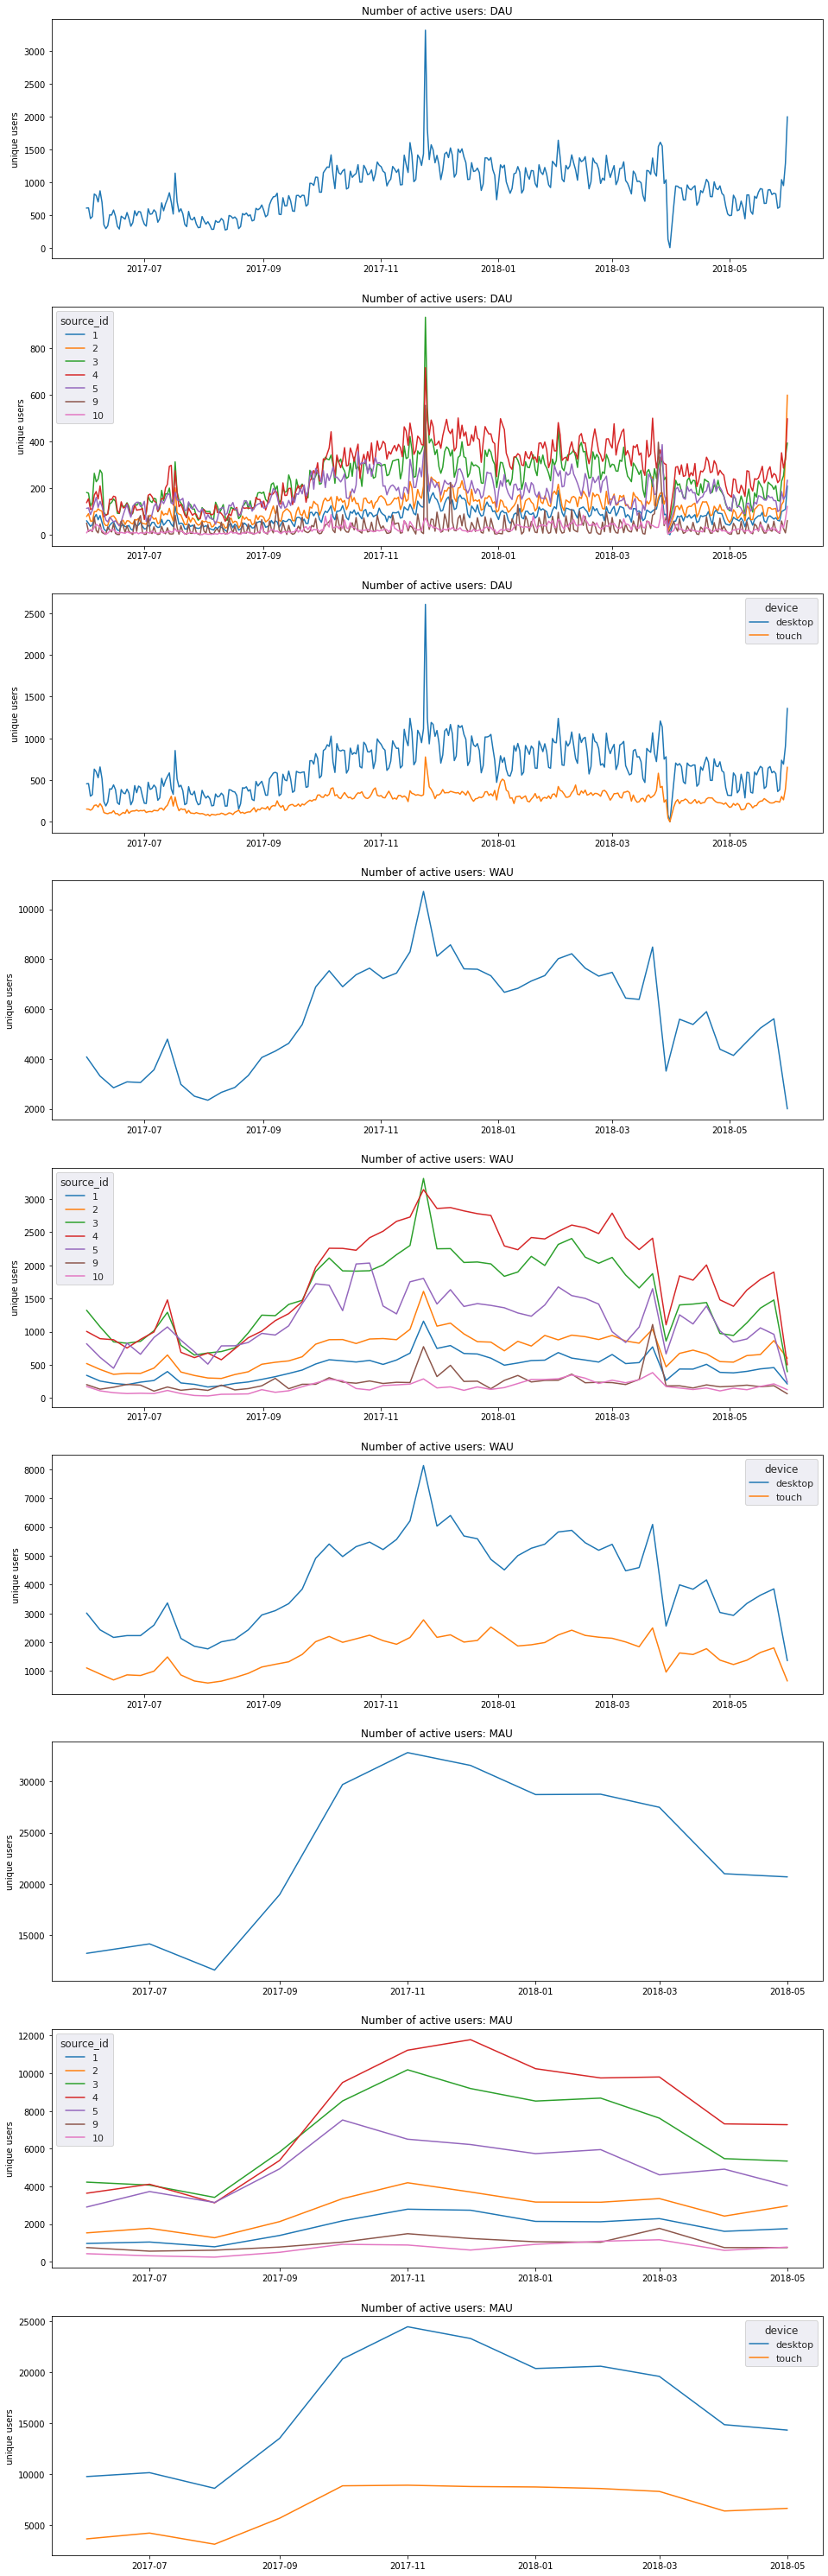

In [44]:
metric = ['dau', 'wau', 'mau']
category = [None, 'source_id', 'device']

number_of_plots = len(metric) * len(category)

fig, axes = plt.subplots(number_of_plots, 1, figsize=(16, 6 * number_of_plots), sharex=False)

for param, ax in zip(list(itertools.product(metric, category)), axes.flatten()):
    plt.sca(ax)
    activity(visits, metric=param[0], category=param[1])
    
    

#### Result:
1. The number of unique users grew from DAU of ~500-600 (WAU ~4000 and MAU ~13000) in June 2017 to DAU oF ~1500 (WAU 9000 and MAU over 30000) in Nov 2017.
2. After Nov 2017 activity declined down to DAU 600-700 users, that is slightly above the initital level. So did WAU and MAU. The trend is negative.
3. We observe some outliers around Nov 24-25, 2017 and March 31, 2018 and in the last days included in the data set.
    - Probably the growth in November 2017 is the result of campaigns on ***Black Friday*** (https://vk.com/wall-105184635_7734)
4. Desktops are still twice as popular as touch devices among users.
5. Main sources of traffic are 4, 3 and 5.
6. Weekdays (Mon-Fri) drive 15-16% of traffic, while weekends only contribute 11-12%.

In [45]:
visits['start_dt'].dt.dayofweek.value_counts(normalize=True).to_frame('Share of weekdays').style.format('{:.1%}')

### Sessions

In [46]:
# preparation to calculate sessions
visits['duration_min'] = (visits['end_ts'] - visits['start_ts']).astype('timedelta64[m]')



def sessions(df, period='daily'):
    '''
    Function that returns groupby object with session stats.
    '''
    
    period_dict = {'daily': 'start_dt', 
                   'weekly': 'start_week',
                   'monthly': 'start_month'
                  }
    
    session_measures = {
        'duration_min':[
            ('total_number', 'count'),
            ('total_time', 'sum'),
            ('average_duration', 'mean'),
            ('median_duration', 'median'),
        ],
        'uid': [
            ('unique_users', 'nunique')
        ]
    }
    
    gpb = df.groupby(period_dict[period]).agg(session_measures).droplevel(0, axis=1).reset_index()
    gpb['sessions_per_user'] = gpb['total_number'] / gpb['unique_users']
    gpb['time_per_user'] = gpb['total_time'] / gpb['unique_users']
    
    return gpb


In [47]:
sessions_daily = sessions(visits, period='daily')
sessions_daily.describe().style.format('{:,.2f}')

[Text(0.5, 1.0, 'Number of sessions per day'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'sessions')]

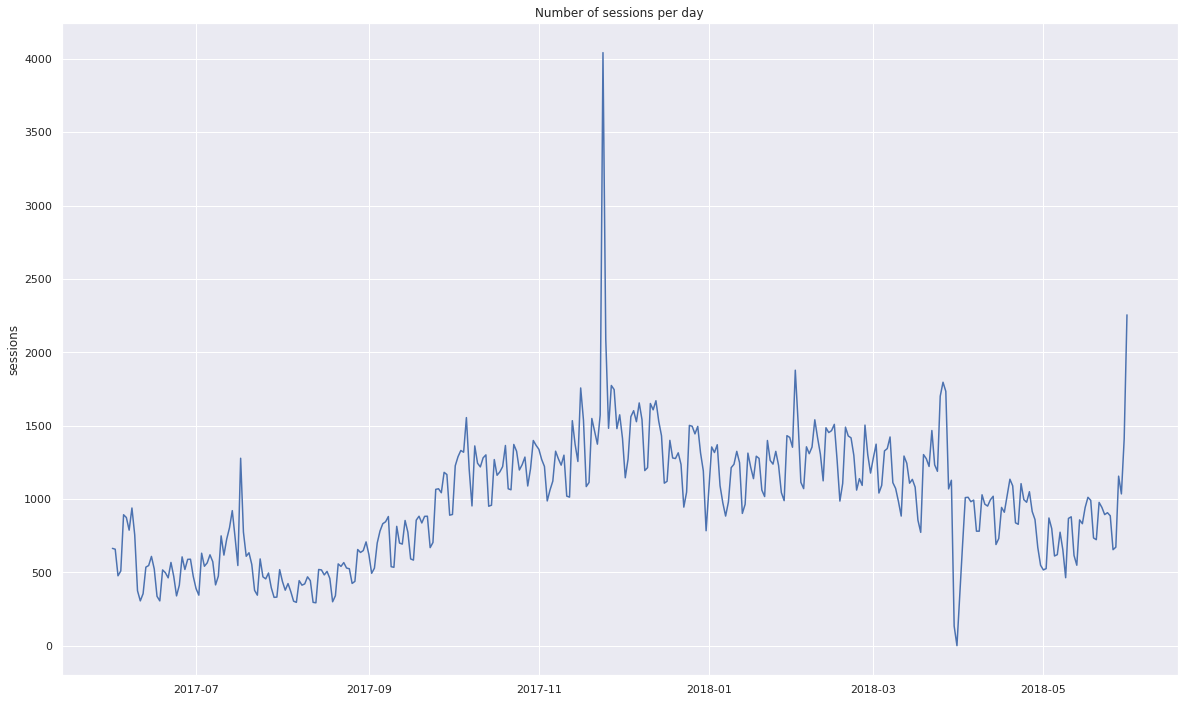

In [48]:
sns.lineplot(data=sessions_daily, x='start_dt', y='total_number') \
    .set(title='Number of sessions per day',
                     xlabel=None,
                     ylabel='sessions')


In [49]:
sessions_weekly = sessions(visits, period='weekly')
sessions_weekly.describe().style.format('{:,.2f}')

In [50]:
sessions_monthly = sessions(visits, period='monthly')
sessions_monthly.describe().style.format('{:,.2f}')

[Text(0.5, 1.0, 'Number of sessions per user'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'sessions')]

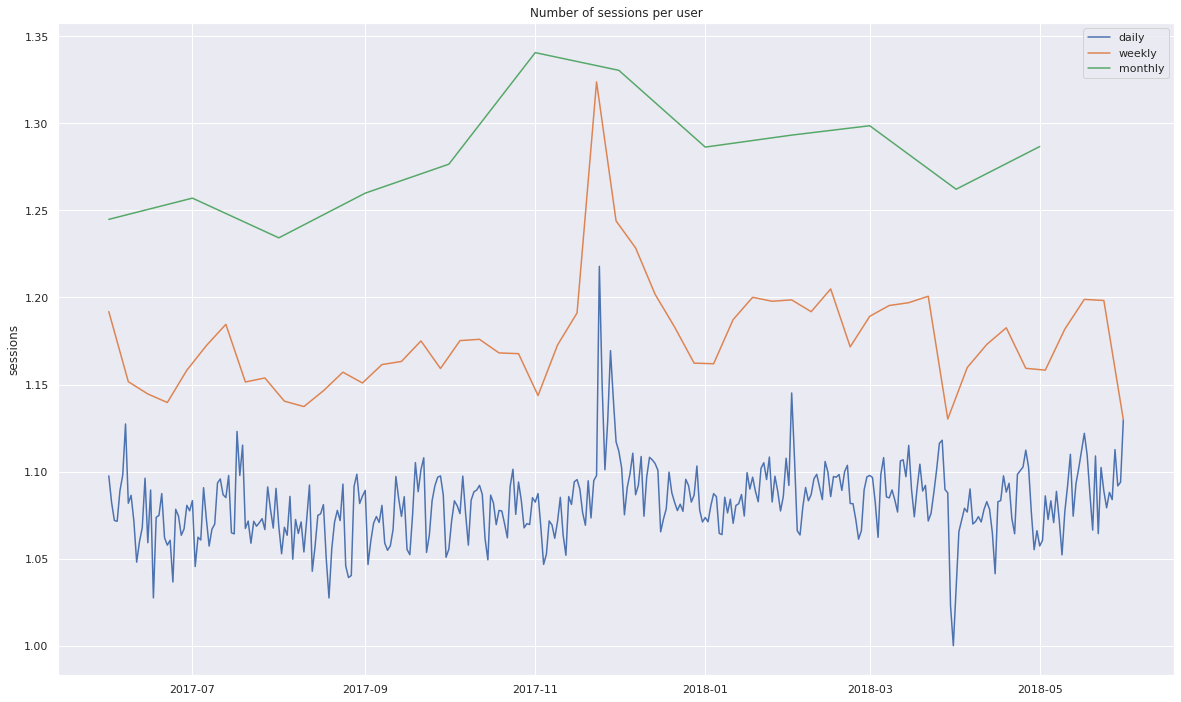

In [51]:
sns.lineplot(data=sessions_daily, x='start_dt', y='sessions_per_user', label = 'daily')
sns.lineplot(data=sessions_weekly, x='start_week', y='sessions_per_user', label = 'weekly')
sns.lineplot(data=sessions_monthly, x='start_month', y='sessions_per_user', label = 'monthly') \
    .set(title='Number of sessions per user',
                     xlabel=None,
                     ylabel='sessions')

In [52]:
hist_min_range = [0, visits['duration_min'].quantile(0.95).round()]

print(visits['duration_min'].describe().round(1))
print('Mode:\t\t', int(visits['duration_min'].mode()))

fig=px.histogram(visits, x='duration_min', color='device',
                 range_x=hist_min_range,
                 title='Distribution of sessions\' duration',
                 template='seaborn'
                )
fig.update_layout(xaxis=dict(title='minutes'))
fig.show()

count    359356.0
mean         10.7
std          16.6
min           0.0
25%           2.0
50%           5.0
75%          14.0
max         711.0
Name: duration_min, dtype: float64
Mode:		 1


#### Result:
1. The number of sessions move alongside with the number of unique users
2. The number of sessions per user is stable on any basis (daily, weekly, monthly) and close to each other (around 1.1-1.3 sessions per user)
3. Average session lasts 10 mins but the distribution is very skewed so that the most typical session is of 1 minute.

### Retention

In [53]:
# visits.drop(columns = ['cohort_x', 'cohort_y', 'cohort_x', 'lifetime', 'cohort_y'], inplace=True)

In [54]:
# Lets calculate monthly cohorts and retention

first_visit = visits.groupby('uid').agg(cohort=('start_month', 'min')).reset_index()
first_visit

uid     cohort
0             11863502262781 2018-03-01
1             49537067089222 2018-02-01
2            297729379853735 2017-06-01
3            313578113262317 2017-09-01
4            325320750514679 2017-09-01
...                      ...        ...
228134  18446403737806311543 2017-11-01
228135  18446424184725333426 2017-12-01
228136  18446556406699109058 2018-01-01
228137  18446621818809592527 2017-12-01
228138  18446676030785672386 2017-10-01

[228139 rows x 2 columns]

In [55]:
visits = visits.merge(first_visit, on='uid')
visits

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
...         ...                 ...        ...                 ...   
359351  desktop 2018-04-23 21:19:00         10 2018-04-23 21:11:00   
359352  desktop 2017-11-08 13:39:00          4 2017-11-08 13:39:00   
359353  desktop 2017-07-31 12:31:00          3 2017-07-31 12:13:00   
359354  desktop 2018-03-20 15:25:00          4 2018-03-20 15:11:00   
359355    touch 2018-04-03 11:23:00          5 2018-04-03 11:19:00   

                         uid   start_dt     end_dt  main_source_id start_week  \
0       16879256277535980062 2017-12-20 2017-12-20               4 2017-12-14   
1         104060357244891740 2018-02-19 2018-02-19               2 2018-02-15   
2        7459035603376831527 2017-07-01 2017-07-01               5 2017-06-29   
3       16174680259334210214 2018-05-20 2018-05-20               4 2018-05-17   
4       16174680259334210214 2018-03-09 2018-03-09               4 2018-03-08   
...                      ...        ...        ...             ...        ...   
359351  12734910664455613822 2018-04-23 2018-04-23              10 2018-04-19   
359352   6761309174945977743 2017-11-08 2017-11-08               4 2017-11-02   
359353  11102751930812818282 2017-07-31 2017-07-31               3 2017-07-27   
359354    272012551460639309 2018-03-20 2018-03-20               4 2018-03-15   
359355   3266363999948772866 2018-04-03 2018-04-03               5 2018-03-29   

       start_month  duration_min     cohort  
0       2017-12-01          18.0 2017-12-01  
1       2018-02-01          28.0 2018-02-01  
2       2017-07-01           0.0 2017-07-01  
3       2018-05-01          24.0 2018-03-01  
4       2018-03-01          28.0 2018-03-01  
...            ...           ...        ...  
359351  2018-04-01           8.0 2018-04-01  
359352  2017-11-01           0.0 2017-11-01  
359353  2017-07-01          18.0 2017-07-01  
359354  2018-03-01          14.0 2018-03-01  
359355  2018-04-01           4.0 2018-04-01  

[359356 rows x 12 columns]

In [56]:
#.astype('timedelta64[M]').astype(int)
visits['lifetime'] = ((visits['start_month'] - visits['cohort']) / np.timedelta64(1, 'M')).round().astype('int')
visits

device              end_ts  source_id            start_ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
...         ...                 ...        ...                 ...   
359351  desktop 2018-04-23 21:19:00         10 2018-04-23 21:11:00   
359352  desktop 2017-11-08 13:39:00          4 2017-11-08 13:39:00   
359353  desktop 2017-07-31 12:31:00          3 2017-07-31 12:13:00   
359354  desktop 2018-03-20 15:25:00          4 2018-03-20 15:11:00   
359355    touch 2018-04-03 11:23:00          5 2018-04-03 11:19:00   

                         uid   start_dt     end_dt  main_source_id start_week  \
0       16879256277535980062 2017-12-20 2017-12-20               4 2017-12-14   
1         104060357244891740 2018-02-19 2018-02-19               2 2018-02-15   
2        7459035603376831527 2017-07-01 2017-07-01               5 2017-06-29   
3       16174680259334210214 2018-05-20 2018-05-20               4 2018-05-17   
4       16174680259334210214 2018-03-09 2018-03-09               4 2018-03-08   
...                      ...        ...        ...             ...        ...   
359351  12734910664455613822 2018-04-23 2018-04-23              10 2018-04-19   
359352   6761309174945977743 2017-11-08 2017-11-08               4 2017-11-02   
359353  11102751930812818282 2017-07-31 2017-07-31               3 2017-07-27   
359354    272012551460639309 2018-03-20 2018-03-20               4 2018-03-15   
359355   3266363999948772866 2018-04-03 2018-04-03               5 2018-03-29   

       start_month  duration_min     cohort  lifetime  
0       2017-12-01          18.0 2017-12-01         0  
1       2018-02-01          28.0 2018-02-01         0  
2       2017-07-01           0.0 2017-07-01         0  
3       2018-05-01          24.0 2018-03-01         2  
4       2018-03-01          28.0 2018-03-01         0  
...            ...           ...        ...       ...  
359351  2018-04-01           8.0 2018-04-01         0  
359352  2017-11-01           0.0 2017-11-01         0  
359353  2017-07-01          18.0 2017-07-01         0  
359354  2018-03-01          14.0 2018-03-01         0  
359355  2018-04-01           4.0 2018-04-01         0  

[359356 rows x 13 columns]

In [57]:
def retention(df):
    '''
    Function that plots retention heatmap
    '''
    cohorts = df.pivot_table(index='cohort', 
                             columns='lifetime',
                             values = 'uid',
                             aggfunc='nunique',
                             margins=False
                            )
    retention = cohorts.iloc[:,0:].div(cohorts[0], axis=0)
    yticklabels = retention.index.values[:-1].astype('datetime64[M]').tolist()
    sns.heatmap(retention, annot=True, fmt=".1%", vmax=0.15, cmap="magma", yticklabels=yticklabels)
    return

Text(0.5, 1.0, 'Overall Retention rate')

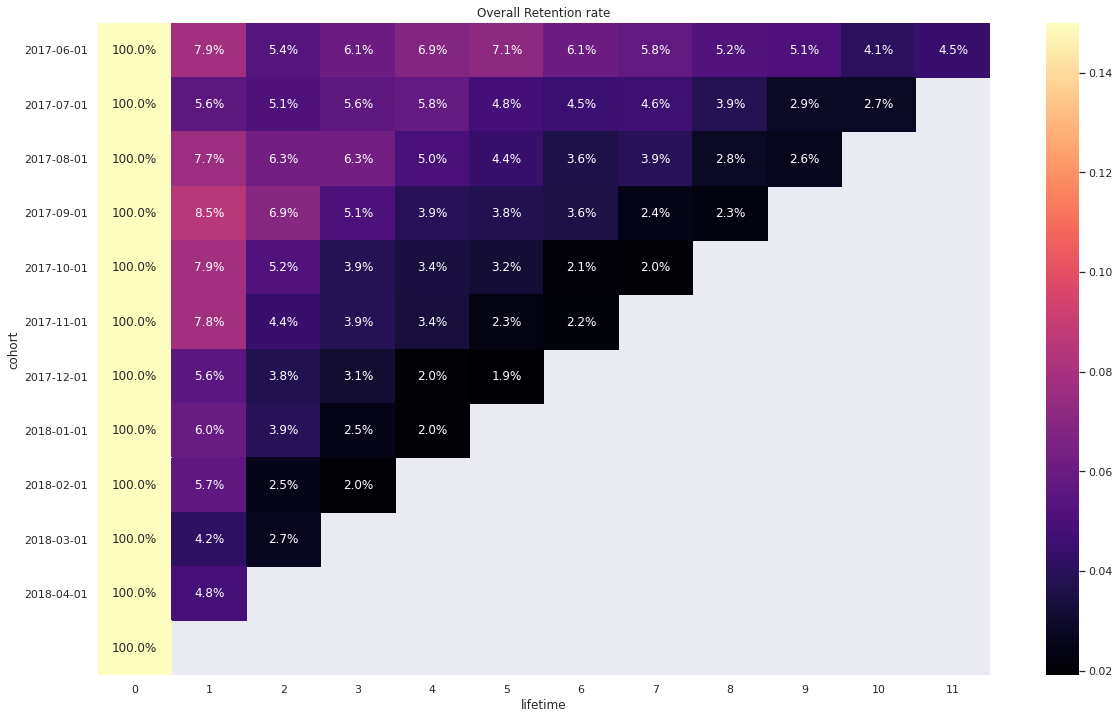

In [58]:
retention(visits)
plt.title('Overall Retention rate')

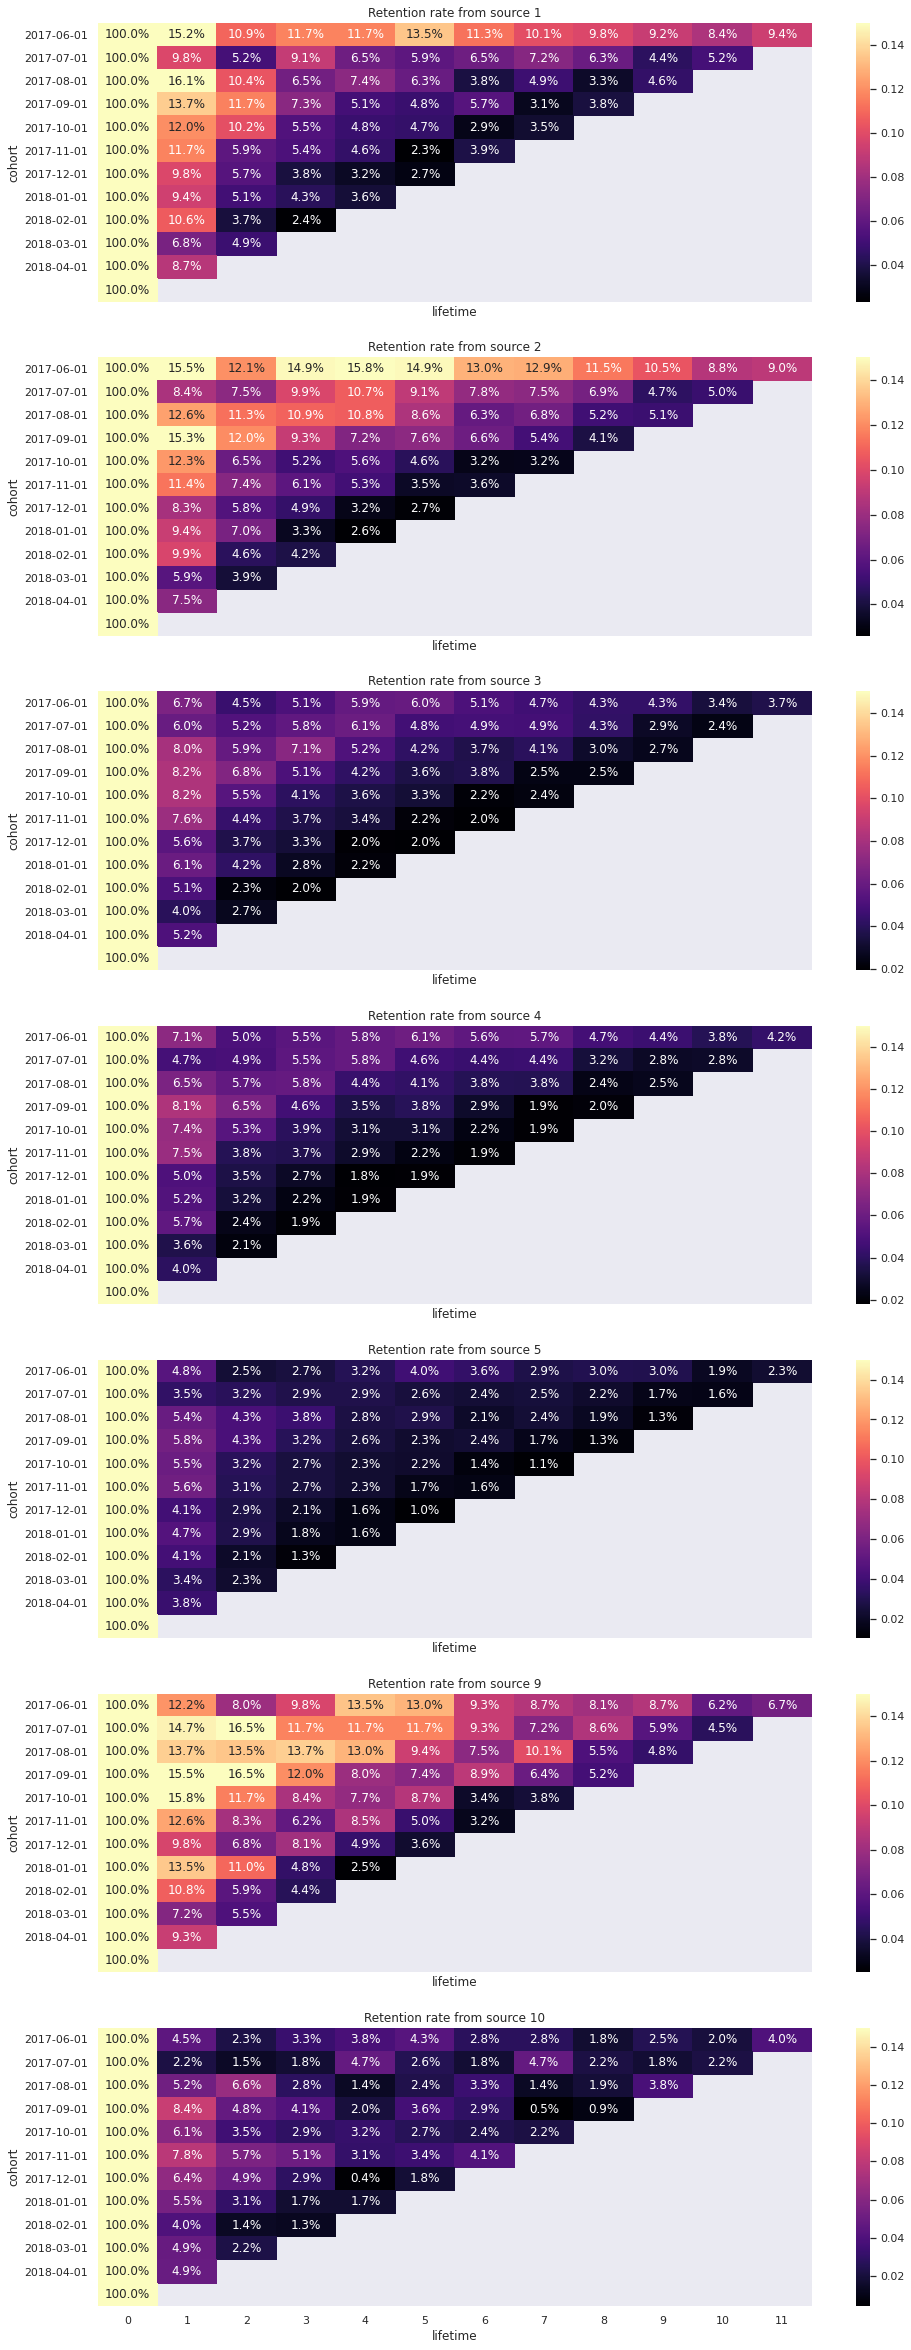

In [59]:
sources = sorted(visits['main_source_id'].unique())

fig, axes = plt.subplots(len(sources), 1 , figsize=(16, 6 * len(sources)), sharex=True, sharey=True)

for src, ax in zip(sources, axes.flatten()):
    plt.sca(ax)
    retention(visits[visits['main_source_id']==src])
    plt.title('Retention rate from source ' + str(src))


#### Result
1. Overall retention rate is quite low and decreases from 5-8% in the first monht to less than 4.5% in a year.
2. Earlier cohorts demonstrate higher retention rates
3. Sources 1,2 and 9 are top 3 efficient in terms of retention.

## Sales

### Funnel

We build stages fo funnel

In [60]:
marketing_by_source = costs.groupby('source_id').agg(total=('costs', 'sum')).reset_index()
marketing_by_source

source_id      total
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [61]:
orders = orders.merge(main_sources_by_uid, on='uid')

In [62]:
orders_by_source = orders.groupby('source_id').agg(total=('uid', 'count')).reset_index()
orders_by_source

source_id  total
0          1   5223
1          2   6392
2          3  13289
3          4  12895
4          5   9406
5          9   1647
6         10   1562

In [63]:
revenue_by_source = orders.groupby('source_id').agg(total=('revenue', 'sum')).reset_index()
revenue_by_source

source_id     total
0          1  31090.55
1          2  46923.61
2          3  54511.24
3          4  56696.83
4          5  52624.02
5          9   5759.40
6         10   4450.33

In [64]:
visits_by_source = visits.groupby('main_source_id').agg(total=('uid', 'count')).reset_index()
visits_by_source.rename(columns={'main_source_id': 'source_id'}, inplace=True)
visits_by_source

source_id   total
0          1   23902
1          2   41829
2          3   99459
3          4  103273
4          5   67964
5          9   12431
6         10   10498

In [65]:
buyers_by_source = orders.groupby('source_id').agg(total=('uid', 'nunique')).reset_index()
buyers_by_source

source_id  total
0          1   2899
1          2   3506
2          3  10473
3          4  10296
4          5   6931
5          9   1088
6         10   1329

In [66]:
users_by_source = visits.groupby('main_source_id').agg(total=('uid', 'nunique')).reset_index()
users_by_source.rename(columns={'main_source_id': 'source_id'}, inplace=True)
users_by_source

source_id  total
0          1   9470
1          2  17617
2          3  66116
3          4  72347
4          5  49238
5          9   6448
6         10   6903

In [67]:
marketing_by_source['stage'] = 'Investment ($)'
visits_by_source['stage'] = 'Visits'
users_by_source['stage'] = 'Users'
buyers_by_source['stage'] = 'Customers'
orders_by_source['stage'] = 'Orders'
revenue_by_source['stage'] = 'Revenue ($)'
funnel = pd.concat([marketing_by_source,
                    users_by_source,
                    visits_by_source,
                    buyers_by_source,
                    orders_by_source,
                    revenue_by_source], axis=0).reset_index()
funnel

index  source_id      total           stage
0       0          1   20833.27  Investment ($)
1       1          2   42806.04  Investment ($)
2       2          3  141321.63  Investment ($)
3       3          4   61073.60  Investment ($)
4       4          5   51757.10  Investment ($)
5       5          9    5517.49  Investment ($)
6       6         10    5822.49  Investment ($)
7       0          1    9470.00           Users
8       1          2   17617.00           Users
9       2          3   66116.00           Users
10      3          4   72347.00           Users
11      4          5   49238.00           Users
12      5          9    6448.00           Users
13      6         10    6903.00           Users
14      0          1   23902.00          Visits
15      1          2   41829.00          Visits
16      2          3   99459.00          Visits
17      3          4  103273.00          Visits
18      4          5   67964.00          Visits
19      5          9   12431.00          Visits
20      6         10   10498.00          Visits
21      0          1    2899.00       Customers
22      1          2    3506.00       Customers
23      2          3   10473.00       Customers
24      3          4   10296.00       Customers
25      4          5    6931.00       Customers
26      5          9    1088.00       Customers
27      6         10    1329.00       Customers
28      0          1    5223.00          Orders
29      1          2    6392.00          Orders
30      2          3   13289.00          Orders
31      3          4   12895.00          Orders
32      4          5    9406.00          Orders
33      5          9    1647.00          Orders
34      6         10    1562.00          Orders
35      0          1   31090.55     Revenue ($)
36      1          2   46923.61     Revenue ($)
37      2          3   54511.24     Revenue ($)
38      3          4   56696.83     Revenue ($)
39      4          5   52624.02     Revenue ($)
40      5          9    5759.40     Revenue ($)
41      6         10    4450.33     Revenue ($)

In [68]:
# Let's take a look at the overall numbers per stages
totals_by_stages = funnel.groupby('stage', sort=False)['total'].sum().astype('int')
pd.DataFrame(totals_by_stages).style.format('{:,.0f}')

In [69]:
# funnel chart

fig = px.funnel(funnel, x='stage', y='total', color='source_id',
                title='Overall funnel',
                template='seaborn',
                orientation='v',
                text='source_id',
                )
fig.update_traces(texttemplate="%{value:,d} / %{percentInitial:.1%}", 
                  hovertemplate="total = %{y}<br>1$ of investment → %{percentInitial:.2f}"
                 )
fig.update_layout(autosize=False,
                  width=1000, height=800,
                  xaxis=dict(title=None,
                             side='top',
                             tickmode = 'array',
                             tickvals = [0, 1, 2, 3, 4, 5],
                             ticktext = ['Investment ($)<br>Total: '+ str(totals_by_stages['Investment ($)'].sum()),
                                         'Users<br>Total: '+ str(totals_by_stages['Users'].sum()),
                                         'Visits<br>Total: '+ str(totals_by_stages['Visits'].sum()),
                                         'Customers<br>Total: '+ str(totals_by_stages['Customers'].sum()),
                                         'Orders<br>Total: '+ str(totals_by_stages['Orders'].sum()),
                                         'Revenue ($)<br>Total: '+ str(totals_by_stages['Revenue ($)'].sum())]
                            )
                 )
fig.show()



#### Result:

1. As expected, different sources give different results, and these results strongly relate to how many customers stick around.
2. The best sources are 1, 2, and 9, and they do better than others.
3. Unfortunately, source 3 is the worst because it brings in very few visitors who don't move through the process.
4. Sources 4 and 10 create a lot of activity, but the people from these sources don't make much money.
5. We need to look closely at Source 5 because it has low customer retention, but people buy a lot from there, so it covers its costs with the money it brings in.
6. These chart shows only overall performance that may help understand the big picture, but final decisions are to be made based on LTV accross sources.

### Days from the first visit to the first purchase

In [70]:
first_order_date = orders.groupby('uid').agg(first_order_date=('buy_dt', 'min'))
first_visit_date = visits.groupby('uid').agg(first_visit_date=('start_dt', 'min'))

first_actions = first_visit_date.merge(first_order_date, on='uid')
#first_actions.rename(columns={'cohort': 'first_visit_date'}, inplace=True)
first_actions['days_to_order'] = ((first_actions['first_order_date'] - first_actions['first_visit_date']) / np.timedelta64(1, 'D')).round().astype('int')
print(first_actions.describe().round(1))


fig=px.histogram(first_actions, x='days_to_order',
                 nbins=364, range_x=[0, 10],
                 title='Distribution of days from visit to order',
                 template='seaborn',
                )
fig.update_layout(xaxis=dict(title='days'))
fig.show()



       days_to_order
count        36522.0
mean            16.9
std             47.1
min              0.0
25%              0.0
50%              0.0
75%              2.0
max            363.0


In [71]:
print('Share of orders made in or before a particular day after visit:')
pd.DataFrame(first_actions['days_to_order'].value_counts(normalize=True).cumsum().head(10)).style.format('{:.1%}')

Share of orders made in or before a particular day after visit:


#### Result:
1. 69% of the first orders occur on the same day as the first visit, while 80% happen within a week.
2. Some users return in a year to make their first order

### Orders over time

As the majority of orders occur on the same day as the first visit, further analysis in this chapter is made based on the date of the first order (not first visit).

In [72]:
orders = orders.merge(first_order_date, on='uid')
orders

buy_ts  revenue                   uid     buy_dt  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   
...                   ...      ...                   ...        ...   
50409 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31   
50410 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31   
50411 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31   
50412 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31   
50413 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01   

       source_id first_order_date  
0              1       2017-06-01  
1              2       2017-06-01  
2              2       2017-06-01  
3              2       2017-06-01  
4              3       2017-06-01  
...          ...              ...  
50409          4       2018-05-31  
50410         10       2018-05-31  
50411          3       2018-05-31  
50412          3       2018-05-31  
50413          4       2018-06-01  

[50414 rows x 6 columns]

In [73]:
orders['buy_month'] = orders['buy_dt'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['lifetime'] = ((orders['buy_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

cohort_size = orders.groupby(['first_order_month']).agg(number_of_buyers=('uid', 'nunique'))

cohort_orders = orders.groupby(['first_order_month', 'lifetime']).agg(number_of_orders=('uid', 'count'))



orders_over_time = cohort_orders.pivot_table(index='first_order_month',
                                                columns='lifetime',
                                                values='number_of_orders',
                                                aggfunc='sum'
                                               ).round(2)

orders_over_time_per_user = orders_over_time.iloc[:,0:].div(cohort_size['number_of_buyers'], axis=0)

Text(0.5, 1.0, 'Cummulative orders per buyer')

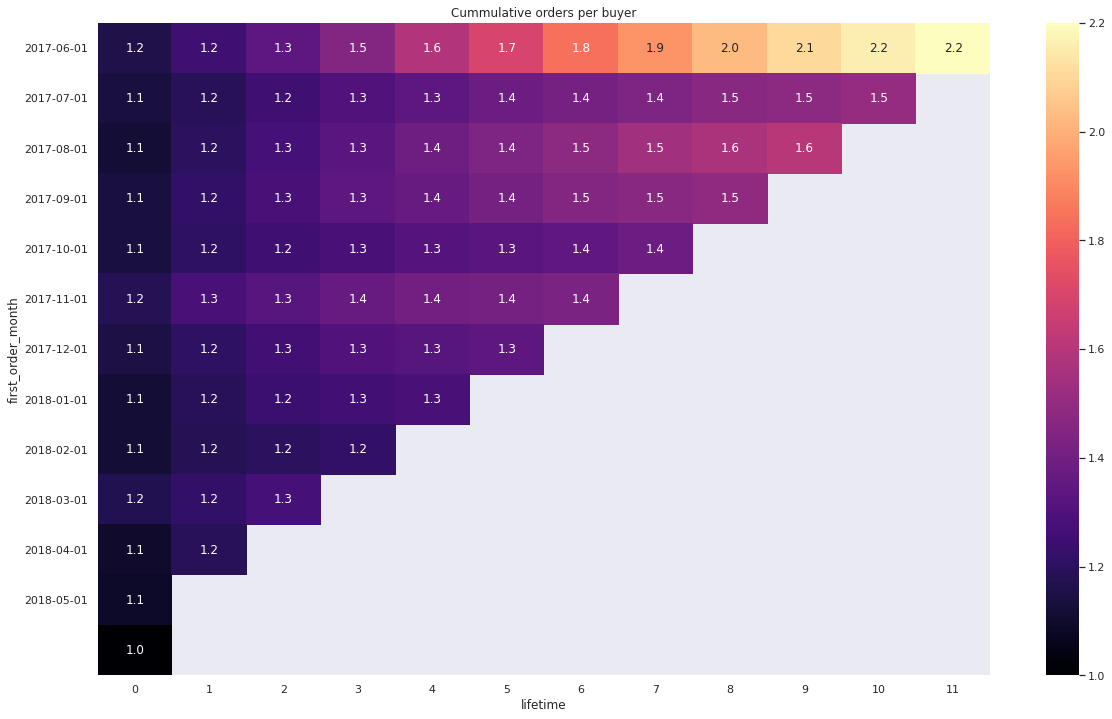

In [74]:
yticklabels = orders_over_time_per_user.index.values[:-1].astype('datetime64[M]').tolist()
sns.heatmap(orders_over_time_per_user.round(2).cumsum(axis=1), annot=True, fmt=".1f", cmap="magma", yticklabels=yticklabels) #vmax=0.15
plt.title('Cummulative orders per buyer')

#### Result
1. On average, buyers make 1.1-1.16 orders in the first month and a total of 2.2 orders in a year.
2. Activity declines as we move across different cohorts over time, with later cohorts showing poorer performance.

### Average purchase price

In [75]:
orders['revenue'].describe().round(2)

count    50414.00
mean         5.00
std         21.82
min          0.00
25%          1.22
50%          2.50
75%          4.89
max       2633.28
Name: revenue, dtype: float64

In [76]:
print(orders['revenue'].describe(percentiles=[0, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]).round(1))

fig=px.histogram(orders, x="revenue",
                 # nbins=364,
                 range_x=[0, 50],
                 title='Distribution of average revenue per order',
                 template='seaborn',
                )
fig.update_layout(xaxis=dict(title='usd'))
fig.show()

count    50414.0
mean         5.0
std         21.8
min          0.0
0%           0.0
25%          1.2
50%          2.5
75%          4.9
90%          9.2
95%         13.8
99%         36.7
99.9%      175.4
max       2633.3
Name: revenue, dtype: float64


Text(0.5, 1.0, 'Average revenue per order')

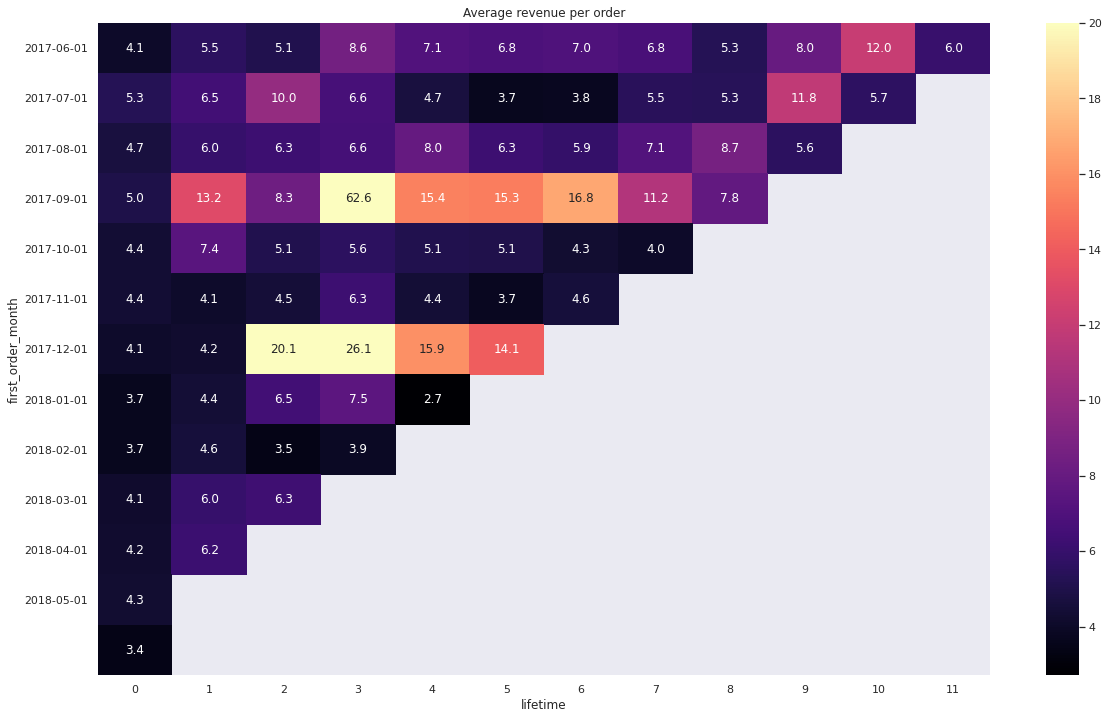

In [77]:
average_order = orders.pivot_table(index='first_order_month', columns='lifetime', values='revenue', aggfunc='mean').round(2)

yticklabels = average_order.index.values[:-1].astype('datetime64[M]').tolist()
sns.heatmap(average_order, annot=True, fmt=".1f", cmap="magma", vmax=20, yticklabels=yticklabels) #vmax=0.15
plt.title('Average revenue per order')

In [78]:
pd.to_datetime(datetime.datetime(2017,9,1,0,0,0))

Timestamp('2017-09-01 00:00:00')

In [79]:
orders['first_order_month']

0       2017-06-01
1       2017-06-01
2       2017-06-01
3       2017-06-01
4       2017-06-01
           ...    
50409   2018-05-01
50410   2018-05-01
50411   2018-05-01
50412   2018-05-01
50413   2018-06-01
Name: first_order_month, Length: 50414, dtype: datetime64[ns]

Reminder about some outliers

In [80]:
orders[orders['uid'] == 5539673724080479777].pivot_table(columns=['buy_month', 'lifetime'],
                                                         values=['uid', 'revenue'],
                                                         aggfunc={'uid': 'count', 'revenue': ['sum', 'mean']}).style.format('{:,.0f}')

In [81]:
orders[orders['uid'] == 11149926373378902217].pivot_table(columns=['buy_month', 'lifetime'],
                                                         values=['uid', 'revenue'],
                                                         aggfunc={'uid': 'count', 'revenue': ['sum', 'mean']}).style.format('{:,.0f}')

#### Result
1. Average order makes USD 5 in revenue.
2. The distribution is very skewed upward. So that median is only USD 2.5
3. Obviuosly, there are outliers in cohorts of Sep and Dec 2017.

### LTV

Text(0.5, 1.0, 'Cummulative LTV')

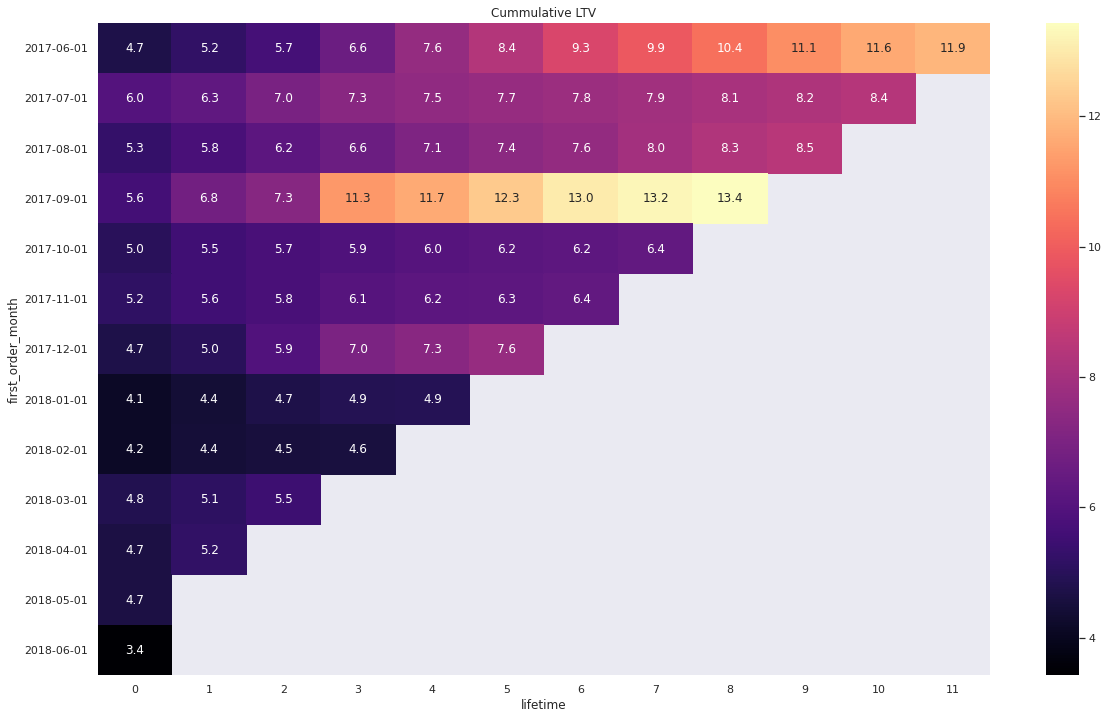

In [82]:
# Calculate LTV based on cohorts of first order (not first visit)

cohort_revenue = orders.pivot_table(index='first_order_month',
                                    columns='lifetime',
                                    values='revenue',
                                    aggfunc='sum'
                                   ).round(2)

LTV = cohort_revenue.iloc[:].div(cohort_size['number_of_buyers'], axis=0)

yticklabels = LTV.index.values[:].astype('datetime64[M]').tolist()
sns.heatmap(LTV.round(2).cumsum(axis=1), annot=True, fmt=".1f", cmap="magma", yticklabels=yticklabels) #vmax=0.15
plt.title('Cummulative LTV')

#### Result
1. Cummulative LTV follows orders
2. There were some extraordinary orders in Dec 2017 by customers from cohort of Sep 2017.

## Marketing

### Total costs

In [83]:
# total costs

costs['month'] = costs['dt'].astype('datetime64[M]')

costs.pivot_table(index='source_id',
                  columns='month',
                  values='costs',
                  aggfunc='sum',
                  margins=True
                 ).style.format('{:,.0f}')

#### Result
1. Marketing costs totaled to USD 329 th over the last year
2. Source 3 is the biggest one and accounts for more than 40% of total costs
3. Monthly costs have increased from USD 18 th in Jun 17 to more than USD 38 th in Nov 2017. And then graduadually decreased down to USD 22 th in May 18. That goes along with visits and DAU.

### CAC

#### CAC by source

In [84]:
# costs by source
costs_by_source = costs.groupby('source_id').agg(total_costs=('costs', 'sum')).reset_index()
costs_by_source

source_id  total_costs
0          1     20833.27
1          2     42806.04
2          3    141321.63
3          4     61073.60
4          5     51757.10
5          9      5517.49
6         10      5822.49

In [85]:
# customer = buyer
CAC_by_source = costs_by_source.merge(buyers_by_source[['source_id', 'total']], on='source_id')
CAC_by_source.columns = ['source_id', 'total_costs','total_customers']
CAC_by_source['CAC'] = CAC_by_source['total_costs'] / CAC_by_source['total_customers']
CAC_by_source.round(2)

source_id  total_costs  total_customers    CAC
0          1     20833.27             2899   7.19
1          2     42806.04             3506  12.21
2          3    141321.63            10473  13.49
3          4     61073.60            10296   5.93
4          5     51757.10             6931   7.47
5          9      5517.49             1088   5.07
6         10      5822.49             1329   4.38

#### CAC over time

We base our analysis on both the date of the first visit and the date of the first order to ensure a comprehensive perspective.

#### Based on the date of the first visit 
While most orders occur within a week of the initial visit, for precise analysis, it's advisable to group buyers by their first visit month, rather than their first order date. This approach aligns with the month when acquisition costs were accrued.

In [86]:
orders = orders.merge(first_visit, on='uid')
orders

buy_ts  revenue                   uid     buy_dt  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   
...                   ...      ...                   ...        ...   
50409 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31   
50410 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31   
50411 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31   
50412 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31   
50413 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01   

       source_id first_order_date  buy_month first_order_month  lifetime  \
0              1       2017-06-01 2017-06-01        2017-06-01         0   
1              2       2017-06-01 2017-06-01        2017-06-01         0   
2              2       2017-06-01 2017-06-01        2017-06-01         0   
3              2       2017-06-01 2017-06-01        2017-06-01         0   
4              3       2017-06-01 2017-06-01        2017-06-01         0   
...          ...              ...        ...               ...       ...   
50409          4       2018-05-31 2018-05-01        2018-05-01         0   
50410         10       2018-05-31 2018-05-01        2018-05-01         0   
50411          3       2018-05-31 2018-05-01        2018-05-01         0   
50412          3       2018-05-31 2018-05-01        2018-05-01         0   
50413          4       2018-06-01 2018-06-01        2018-06-01         0   

          cohort  
0     2017-06-01  
1     2017-06-01  
2     2017-06-01  
3     2017-06-01  
4     2017-06-01  
...          ...  
50409 2018-05-01  
50410 2018-05-01  
50411 2018-05-01  
50412 2017-10-01  
50413 2018-05-01  

[50414 rows x 10 columns]

In [87]:
costs_by_source_month = costs.groupby(['source_id', 'month']).agg(total_costs=('costs', 'sum')).reset_index()
buyers_by_source_first_visit = orders.groupby(['source_id', 'cohort']).agg(total_customers=('uid', 'nunique')).reset_index()
CAC_by_source_first_visit = costs_by_source_month.merge(buyers_by_source_first_visit, left_on=['source_id', 'month'], right_on=['source_id', 'cohort'])

CAC_by_source_first_visit['CAC'] = CAC_by_source_first_visit['total_costs'] / CAC_by_source_first_visit['total_customers']
CAC_by_source_first_visit.round(2)

source_id      month  total_costs     cohort  total_customers   CAC
0           1 2017-06-01      1125.61 2017-06-01              240  4.69
1           1 2017-07-01      1072.88 2017-07-01              184  5.83
2           1 2017-08-01       951.81 2017-08-01              126  7.55
3           1 2017-09-01      1502.01 2017-09-01              248  6.06
4           1 2017-10-01      2315.75 2017-10-01              350  6.62
..        ...        ...          ...        ...              ...   ...
79         10 2018-01-01       614.35 2018-01-01              103  5.96
80         10 2018-02-01       480.88 2018-02-01              113  4.26
81         10 2018-03-01       526.41 2018-03-01              166  3.17
82         10 2018-04-01       388.25 2018-04-01               98  3.96
83         10 2018-05-01       409.86 2018-05-01              101  4.06

[84 rows x 6 columns]

In [88]:
fig = px.line(CAC_by_source_first_visit.round(1), x="month", y="CAC",color='source_id', title='CAC based on the first visit', template='seaborn')
fig.show()

#### Based on the date of the first order

This approach introduces a certain bias because it divides the costs of a given month by the number of customers who make a purchase in that same month. This method may not account for customers who were initially attracted as visitors in previous months, incurring acquisition costs earlier.

However, this approach is more suitable for calculating ROI in terms of customers. It's essential to acknowledge that in doing so, we may overlook potential gaps between the first visit and the first order. Nevertheless, it's worth noting that in our case, with 80% of orders taking place within a week after the initial visit, this factor can be safely disregarded. In situations where this is not the case, it could be a more significant consideration.

In [89]:
buyers_by_source_first_order = orders.groupby(['source_id', 'first_order_month']).agg(total_customers=('uid', 'nunique')).reset_index()
CAC_by_source_first_order = costs_by_source_month.merge(buyers_by_source_first_order, left_on=['source_id', 'month'], right_on=['source_id', 'first_order_month'])

CAC_by_source_first_order['CAC'] = CAC_by_source_first_order['total_costs'] / CAC_by_source_first_order['total_customers']
CAC_by_source_first_order.round(2)

source_id      month  total_costs first_order_month  total_customers   CAC
0           1 2017-06-01      1125.61        2017-06-01              190  5.92
1           1 2017-07-01      1072.88        2017-07-01              160  6.71
2           1 2017-08-01       951.81        2017-08-01              113  8.42
3           1 2017-09-01      1502.01        2017-09-01              227  6.62
4           1 2017-10-01      2315.75        2017-10-01              340  6.81
..        ...        ...          ...               ...              ...   ...
79         10 2018-01-01       614.35        2018-01-01               92  6.68
80         10 2018-02-01       480.88        2018-02-01              123  3.91
81         10 2018-03-01       526.41        2018-03-01              186  2.83
82         10 2018-04-01       388.25        2018-04-01              107  3.63
83         10 2018-05-01       409.86        2018-05-01              130  3.15

[84 rows x 6 columns]

In [90]:
fig = px.line(CAC_by_source_first_order.round(1), x="month", y="CAC",color='source_id', title='CAC  based on the first order', template='seaborn')
fig.show()

#### Result
1. CAC calculated based on the date of the first visit shows a gradual and nearly consistent increase across most channels. This more accurate metric reflects the acquisition cost of buyers over time through various sources. However, in this approach, we tend to underestimate the number of attracted customers in the later months.
2. CAC computed from the date of the first order appears stable, although it tends to be biased upward in the initial months.
3. The relative CAC values for different sources remain consistent between both calculation methods. Sources 2 and 3 consistently emerge as the most expensive channels.

### ROI

We calculate ROI based on the first order date

#### ROI by cohorts

In [91]:
buyers_by_first_order = orders.groupby("first_order_month").agg(size_of_cohort=('uid', 'nunique')).reset_index()
costs_by_month = costs.groupby('month').agg(total_costs=('costs', 'sum'))

CAC_by_month = costs_by_month.merge(buyers_by_first_order, left_on='month', right_on='first_order_month')
CAC_by_month['CAC'] = CAC_by_month['total_costs'] / CAC_by_month['size_of_cohort']
CAC_by_month

total_costs first_order_month  size_of_cohort        CAC
0      18015.00        2017-06-01            2023   8.905091
1      18240.59        2017-07-01            1923   9.485486
2      14790.54        2017-08-01            1369  10.803901
3      24368.91        2017-09-01            2581   9.441654
4      36322.88        2017-10-01            4340   8.369327
5      37907.88        2017-11-01            4081   9.288870
6      38315.35        2017-12-01            4383   8.741809
7      33518.52        2018-01-01            3373   9.937302
8      32723.03        2018-02-01            3651   8.962758
9      30415.27        2018-03-01            3533   8.608907
10     22289.38        2018-04-01            2276   9.793225
11     22224.27        2018-05-01            2988   7.437841

In [92]:
ROI_by_cohort = LTV.cumsum(axis=1).iloc[:-1, :] \
                    .div(CAC_by_month.set_index(CAC_by_month['first_order_month'])['CAC'], axis=0)

print('ROI over buyers\' cohorts:')
ROI_by_cohort.index =  ROI_by_cohort.index.strftime('%Y-%m-%d')
ROI_by_cohort.style.format('{:.2f}', na_rep="").background_gradient(cmap='RdYlGn', axis=1, vmax=1).highlight_null('white')

ROI over buyers' cohorts:


#### ROI by source

In [93]:
ltv_by_source=orders.groupby(['source_id'])[['uid','revenue']].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_by_source.columns=['source_id','total_customers','revenue']
ltv_by_source['LTV']=ltv_by_source['revenue']/ltv_by_source['total_customers']
ROI_by_source = ltv_by_source[['source_id', 'LTV']].merge(CAC_by_source[['source_id', 'CAC']], on='source_id')
ROI_by_source['ROI'] = ROI_by_source['LTV'] / ROI_by_source['CAC']

In [94]:
fig = px.bar(ROI_by_source, x='source_id', y='ROI', title='ROI by sources', template='seaborn')
fig.update_xaxes(type='category')
fig.add_hline(y=1, line_width=2, line_dash="dash", line_color="red",
              annotation_text="Breakeven level"
             )
fig.update_layout(title_x=0.5)
fig.show()

#### Result
1. Overall business demonstrates poor performance.
2. The only cohort that paid off over LTM is of June 2017. The cohorts of Sep 2017 and Dec 2017 are biased by substantial orders. And the older the chort the poorer the performance is.
3. And the company should revise its marketing policy in terms of sources of traffic as most of them do not pay off its costs.

## Extra: Black Friday campaign

### Overview

In [95]:
# Costs

fig = px.bar(costs[costs['month'].dt.strftime('%Y-%m-%d') == '2017-11-01'],
             x='dt', y='costs',
             color='source_id', 
             title='Costs in November 2017'
            )
fig.update_layout(title_x=0.5, xaxis=dict(title=None))
fig.show()

In [96]:
# visits

visits_nov = visits[visits['start_month'].dt.strftime('%Y-%m-%d') == '2017-11-01']

fig = px.bar(visits_nov.groupby(['start_dt', 'source_id'])['uid'].count().reset_index() ,
             x='start_dt', y='uid',
             color='source_id',
             title='Visits in November 2017'
            )
fig.update_layout(title_x=0.5, xaxis=dict(title=None))
fig.show()

In [97]:
# orders

orders_nov = orders[orders['buy_month'].dt.strftime('%Y-%m-%d') == '2017-11-01']

fig = px.bar(orders_nov.groupby(['buy_dt', 'source_id'])['uid'].count().reset_index() ,
             x='buy_dt', y='uid',
             color='source_id',
             title='Orders in November 2017' )
fig.update_layout(title_x=0.5, xaxis=dict(title=None))
fig.show()

In [98]:
# orders

orders_nov = orders[orders['buy_month'].dt.strftime('%Y-%m-%d') == '2017-11-01']

fig = px.bar(orders_nov.groupby(['buy_dt', 'source_id'])['revenue'].sum().reset_index() ,
             x='buy_dt', y='revenue',
             color='source_id',
             title='Revenue in November 2017' )
fig.update_layout(title_x=0.5, xaxis=dict(title=None))
fig.show()

### Building sample

Let's examine the outcomes of the Black Friday campaign. 

First, we will include all visitors on November 24 and 25 in our target audience, as the campaign's costs cannot be directly divided, and the promocodes were accessible to all users, not restricted to specific groups or new users.

In [99]:
BF_uids = visits[(visits['start_dt'].dt.strftime('%Y-%m-%d') == '2017-11-24') 
                 | (visits['start_dt'].dt.strftime('%Y-%m-%d') == '2017-11-25')]['uid'].unique().tolist()
print('The number of participants: ', len(BF_uids))

The number of participants:  4864


In [100]:
before_BF_uids = visits[(visits['start_dt'].dt.strftime('%Y-%m-%d') < '2017-11-24')]['uid'].unique().tolist()

In [101]:
new_BF_uids = set(BF_uids).difference(before_BF_uids)
print('The number of of new users: ', len(new_BF_uids))

The number of of new users:  3379


In [102]:
# visits and unique visitors
visits_bf = visits[visits['uid'].isin(BF_uids)]
visits_bf.pivot_table(index='cohort',
                      columns='source_id',
                      values='uid',
                      aggfunc=['count', 'nunique'],
                      margins=True
                     )

count                                           nunique  \
source_id               1     2     3     4     5     9   10    All       1   
cohort                                                                        
2017-06-01 00:00:00  4469  4145   749  1026  1332   203   41  11965     136   
2017-07-01 00:00:00   443   611   258   377   197   112   18   2016      51   
2017-08-01 00:00:00   230   244   116   211   212   151   11   1175      41   
2017-09-01 00:00:00   392   589   285   338   165   153   19   1941      84   
2017-10-01 00:00:00   585   437   330   453   223   159   18   2205     117   
2017-11-01 00:00:00  1291  1801  1922  2036  1002   638  510   9200     627   
All                  7410  7827  3660  4441  3131  1416  617  28502    1056   

                                                             
source_id               2     3     4     5    9   10   All  
cohort                                                       
2017-06-01 00:00:00   150   163   145   130   85   22   241  
2017-07-01 00:00:00    58    91    81    55   44   11   127  
2017-08-01 00:00:00    39    63    58    37   41    3   103  
2017-09-01 00:00:00    94   132   127    59   69   13   215  
2017-10-01 00:00:00   140   176   182   104   78   16   299  
2017-11-01 00:00:00   750  1556  1271   798  452  138  3879  
All                  1231  2181  1864  1183  769  203  4864

In [103]:
# visits and unique visitors
visits_new_bf = visits[visits['uid'].isin(new_BF_uids)]
visits_new_bf.pivot_table(index='cohort',
                      columns='source_id',
                      values='uid',
                      aggfunc=['count', 'nunique'],
                      margins=True
                     )

count                                       nunique       \
source_id               1    2     3     4    5    9   10   All       1    2   
cohort                                                                         
2017-11-01 00:00:00   746  933  1504  1400  784  484  129  5980     434  538   
All                   746  933  1504  1400  784  484  129  5980     434  538   

                                                      
source_id               3     4    5    9   10   All  
cohort                                                
2017-11-01 00:00:00  1305  1014  669  364  100  3379  
All                  1305  1014  669  364  100  3379

Approx. 1500 users out of 4864  had visited our site before Black Friday.

Text(0.5, 1.0, 'Retention of users who participated in Black Friday')

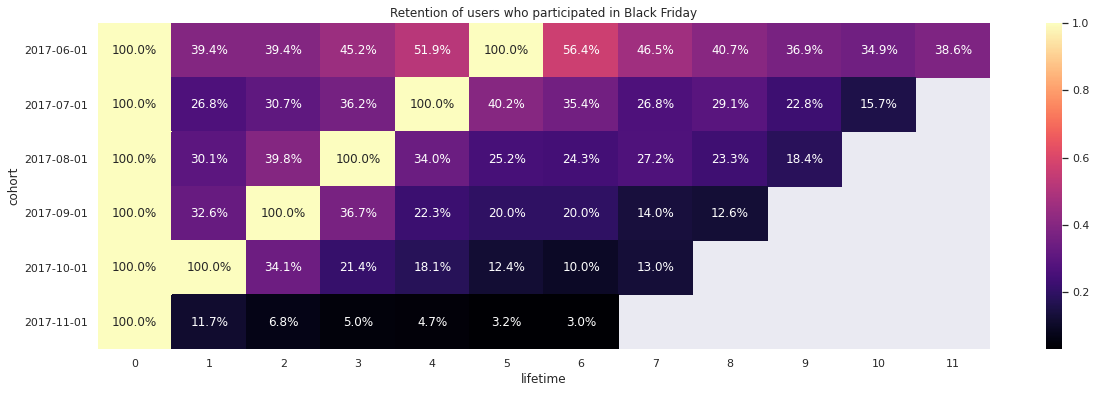

In [104]:
cohorts_bf = visits_bf.pivot_table(index='cohort', 
                             columns='lifetime',
                             values = 'uid',
                             aggfunc='nunique',
                             margins=False
                            )
retention = cohorts_bf.iloc[:,0:].div(cohorts_bf[0], axis=0)
fig, ax = plt.subplots(figsize=(20,6))
yticklabels = retention.index.values.astype('datetime64[M]').tolist()
sns.heatmap(retention, annot=True, fmt=".1%", cmap="magma", yticklabels=yticklabels, ax=ax)
plt.title('Retention of users who participated in Black Friday')

Text(0.5, 1.0, 'Retention of users who participated in Black Friday')

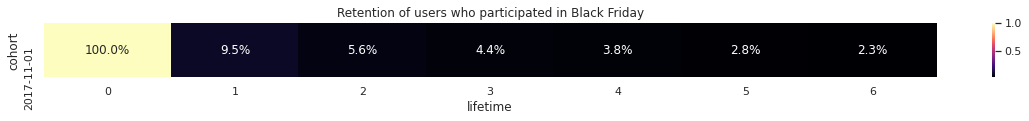

In [105]:
cohorts_new_bf = visits_new_bf.pivot_table(index='cohort', 
                             columns='lifetime',
                             values = 'uid',
                             aggfunc='nunique',
                             margins=False
                            )
retention = cohorts_new_bf.iloc[:,0:].div(cohorts_new_bf[0], axis=0)
fig, ax = plt.subplots(figsize=(20,1))
yticklabels = retention.index.values.astype('datetime64[M]').tolist()
sns.heatmap(retention, annot=True, fmt=".1%", cmap="magma", yticklabels=yticklabels, ax=ax)
plt.title('Retention of users who participated in Black Friday')

A third of the participants were active users before Black Friday, and they exhibited retention rates that exceeded the average.
This is why we cannot calculate the campaign's results for all participants. Further, we will attempt to construct the sales funnel exclusively for new visitors and assess marketing costs associated with them.
Since we lack information on the prime costs of the campaign (including losses due to ticket discounts), we aren't overlooking any potential side effects. However, it's important to bear in mind that these costs exist and should be considered in real analysis.

### Funnel of the Black Friday

A third of the participants were active users before Black Friday, and they exhibited retention rates that exceeded the average.
This is why we cannot calculate the campaign's results for all participants. Further, we will attempt to construct the sales funnel exclusively for new visitors and assess marketing costs associated with them.
Since we lack information on the prime costs of the campaign (including losses due to ticket discounts), we aren't overlooking any potential side effects. However, it's important to bear in mind that these costs exist and should be considered in real analysis.

In [106]:
visits_new_bf[(visits_new_bf['start_dt'].dt.strftime('%Y-%m-%d') < '2017-11-26')
              & ~(visits_new_bf['source_id'] == visits_new_bf['main_source_id'])]

device              end_ts  source_id            start_ts  \
11811   desktop 2017-11-25 11:44:00          1 2017-11-25 11:41:00   
13143   desktop 2017-11-24 16:29:00          2 2017-11-24 15:59:00   
14666   desktop 2017-11-24 21:00:00          1 2017-11-24 20:21:00   
14668   desktop 2017-11-24 17:47:00          2 2017-11-24 17:20:00   
14670   desktop 2017-11-24 15:05:00          4 2017-11-24 14:39:00   
...         ...                 ...        ...                 ...   
313790  desktop 2017-11-24 20:29:00          3 2017-11-24 20:20:00   
314133    touch 2017-11-25 21:22:00          1 2017-11-25 21:22:00   
330751    touch 2017-11-25 10:05:00          4 2017-11-25 09:28:00   
336520  desktop 2017-11-24 22:08:00          4 2017-11-24 21:49:00   
339496  desktop 2017-11-24 11:12:00          9 2017-11-24 10:59:00   

                         uid   start_dt     end_dt  main_source_id start_week  \
11811   17961998355366346316 2017-11-25 2017-11-25               3 2017-11-23   
13143   14049658256452210149 2017-11-24 2017-11-24               4 2017-11-23   
14666   18387689450904682366 2017-11-24 2017-11-24               3 2017-11-23   
14668   18387689450904682366 2017-11-24 2017-11-24               3 2017-11-23   
14670   18387689450904682366 2017-11-24 2017-11-24               3 2017-11-23   
...                      ...        ...        ...             ...        ...   
313790  10925069216728786133 2017-11-24 2017-11-24               4 2017-11-23   
314133   2227075921431790760 2017-11-25 2017-11-25              10 2017-11-23   
330751   6600396643158224277 2017-11-25 2017-11-25               3 2017-11-23   
336520   8405450856023557384 2017-11-24 2017-11-24               1 2017-11-23   
339496   3180426866801174826 2017-11-24 2017-11-24               4 2017-11-23   

       start_month  duration_min     cohort  lifetime  
11811   2017-11-01           3.0 2017-11-01         0  
13143   2017-11-01          30.0 2017-11-01         0  
14666   2017-11-01          39.0 2017-11-01         0  
14668   2017-11-01          27.0 2017-11-01         0  
14670   2017-11-01          26.0 2017-11-01         0  
...            ...           ...        ...       ...  
313790  2017-11-01           9.0 2017-11-01         0  
314133  2017-11-01           0.0 2017-11-01         0  
330751  2017-11-01          37.0 2017-11-01         0  
336520  2017-11-01          19.0 2017-11-01         0  
339496  2017-11-01          13.0 2017-11-01         0  

[358 rows x 13 columns]

In [107]:
costs
all_visits_by_source_and_dt = visits.groupby(['start_dt', 'source_id']).agg(total_visits=('uid', 'count')).reset_index()
visits_by_bf = visits_new_bf.groupby(['start_dt', 'source_id']).agg(total_visits_bf=('uid', 'count')).reset_index()
costs

source_id         dt  costs      month
0             1 2017-06-01  75.20 2017-06-01
1             1 2017-06-02  62.25 2017-06-01
2             1 2017-06-03  36.53 2017-06-01
3             1 2017-06-04  55.00 2017-06-01
4             1 2017-06-05  57.08 2017-06-01
...         ...        ...    ...        ...
2537         10 2018-05-27   9.92 2018-05-01
2538         10 2018-05-28  21.26 2018-05-01
2539         10 2018-05-29  11.32 2018-05-01
2540         10 2018-05-30  33.15 2018-05-01
2541         10 2018-05-31  17.60 2018-05-01

[2542 rows x 4 columns]

In [108]:
costs_for_bf = visits_by_bf.merge(all_visits_by_source_and_dt, on=['start_dt', 'source_id' ])

In [109]:
costs_for_bf = costs_for_bf.merge(costs[['dt', 'source_id', 'costs']],
                                  left_on=['start_dt', 'source_id'],
                                  right_on=['dt', 'source_id'])
costs_for_bf

start_dt  source_id  total_visits_bf  total_visits         dt    costs
0   2017-11-24          1              298           615 2017-11-24   245.75
1   2017-11-24          2              301           612 2017-11-24   507.09
2   2017-11-24          3              763           965 2017-11-24  1788.28
3   2017-11-24          4              518           783 2017-11-24    80.88
4   2017-11-24          5              336           417 2017-11-24   719.22
..         ...        ...              ...           ...        ...      ...
718 2018-05-31          1                1           244 2018-05-31   141.70
719 2018-05-31          2                1           649 2018-05-31   254.15
720 2018-05-31          4                2           509 2018-05-31   492.54
721 2018-05-31          5                1           253 2018-05-31   398.04
722 2018-05-31          9                2            62 2018-05-31    27.37

[723 rows x 6 columns]

In [110]:
costs_for_bf['avg_costs'] = costs_for_bf['costs'] / costs_for_bf['total_visits']
costs_for_bf['bf_costs'] = costs_for_bf['avg_costs'] * costs_for_bf['total_visits_bf']
costs_for_bf.sum().to_frame('sum').round(2)

sum
source_id          2949.00
total_visits_bf    5980.00
total_visits     155525.00
costs            134328.50
avg_costs           599.31
bf_costs           5249.68

The costs for acquiring new Black Friday users in November and beyond amount to USD 5250.

**Now building tables for Sales Funnel**

In [111]:
marketing_bf_by_source = costs_for_bf.groupby('source_id').agg(total=('bf_costs', 'sum')).reset_index()
marketing_bf_by_source

source_id        total
0          1   319.514348
1          2   747.872985
2          3  2526.958926
3          4   506.824376
4          5   958.150853
5          9   105.831124
6         10    84.523645

In [112]:
orders_bf = orders[orders['uid'].isin(new_BF_uids)]
orders_bf

buy_ts  revenue                   uid     buy_dt  \
22945 2017-11-24 00:45:00     2.33   7088301710504245693 2017-11-24   
22946 2017-11-24 00:47:00     7.33  10660667181826643412 2017-11-24   
22947 2017-11-24 00:55:00     1.47   1768245505726110683 2017-11-24   
22950 2017-11-24 01:02:00     1.69    672184307879331776 2017-11-24   
22951 2017-11-24 01:16:00     0.40   4871011968810924690 2017-11-24   
...                   ...      ...                   ...        ...   
48548 2018-05-18 20:56:00     1.53   6352456154553134706 2018-05-18   
49197 2018-05-24 20:54:00     2.75   3614697785160724594 2018-05-24   
49243 2018-05-25 13:36:00     1.22  16716920895171120362 2018-05-25   
49254 2018-05-25 15:04:00     7.33   2993436365312219383 2018-05-25   
50060 2018-05-31 10:52:00    15.89  16866372696123688851 2018-05-31   

       source_id first_order_date  buy_month first_order_month  lifetime  \
22945          1       2017-11-24 2017-11-01        2017-11-01         0   
22946          4       2017-11-24 2017-11-01        2017-11-01         0   
22947          1       2017-11-24 2017-11-01        2017-11-01         0   
22950          1       2017-11-24 2017-11-01        2017-11-01         0   
22951          3       2017-11-24 2017-11-01        2017-11-01         0   
...          ...              ...        ...               ...       ...   
48548         10       2018-05-18 2018-05-01        2018-05-01         0   
49197          3       2018-05-24 2018-05-01        2018-05-01         0   
49243         10       2018-05-25 2018-05-01        2018-05-01         0   
49254          3       2018-05-25 2018-05-01        2018-05-01         0   
50060          1       2018-05-31 2018-05-01        2018-05-01         0   

          cohort  
22945 2017-11-01  
22946 2017-11-01  
22947 2017-11-01  
22950 2017-11-01  
22951 2017-11-01  
...          ...  
48548 2017-11-01  
49197 2017-11-01  
49243 2017-11-01  
49254 2017-11-01  
50060 2017-11-01  

[960 rows x 10 columns]

In [113]:
orders_bf_by_source = orders_bf.groupby('source_id').agg(total=('uid', 'count')).reset_index()
orders_bf_by_source

source_id  total
0          1     96
1          2    144
2          3    318
3          4    190
4          5    103
5          9     79
6         10     30

In [114]:
revenue_bf_by_source = orders_bf.groupby('source_id').agg(total=('revenue', 'sum')).reset_index()
revenue_bf_by_source

source_id   total
0          1  572.76
1          2  559.81
2          3  934.53
3          4  580.57
4          5  379.42
5          9  184.33
6         10   51.94

In [115]:
visits_bf_by_source = visits_new_bf.groupby('main_source_id').agg(total=('uid', 'count')).reset_index()
visits_bf_by_source.rename(columns={'main_source_id': 'source_id'}, inplace=True)
visits_bf_by_source

source_id  total
0          1    455
1          2    737
2          3   2031
3          4   1330
4          5    742
5          9    553
6         10    132

In [116]:
buyers_bf_by_source = orders_bf.groupby('source_id').agg(total=('uid', 'nunique')).reset_index()
buyers_bf_by_source

source_id  total
0          1     75
1          2    101
2          3    227
3          4    142
4          5     76
5          9     61
6         10     25

In [117]:
users_bf_by_source = visits_new_bf.groupby('main_source_id').agg(total=('uid', 'nunique')).reset_index()
users_bf_by_source.rename(columns={'main_source_id': 'source_id'}, inplace=True)
users_bf_by_source

source_id  total
0          1    199
1          2    335
2          3   1171
3          4    756
4          5    510
5          9    326
6         10     82

In [118]:
marketing_bf_by_source['stage'] = 'Investment ($)'
visits_bf_by_source['stage'] = 'Visits'
users_bf_by_source['stage'] = 'Users'
buyers_bf_by_source['stage'] = 'Customers'
orders_bf_by_source['stage'] = 'Orders'
revenue_bf_by_source['stage'] = 'Revenue ($)'
funnel_bf = pd.concat([marketing_bf_by_source,
                    users_bf_by_source,
                    visits_bf_by_source,
                    buyers_bf_by_source,
                    orders_bf_by_source,
                    revenue_bf_by_source],
                   axis=0)
funnel_bf

source_id        total           stage
0          1   319.514348  Investment ($)
1          2   747.872985  Investment ($)
2          3  2526.958926  Investment ($)
3          4   506.824376  Investment ($)
4          5   958.150853  Investment ($)
5          9   105.831124  Investment ($)
6         10    84.523645  Investment ($)
0          1   199.000000           Users
1          2   335.000000           Users
2          3  1171.000000           Users
3          4   756.000000           Users
4          5   510.000000           Users
5          9   326.000000           Users
6         10    82.000000           Users
0          1   455.000000          Visits
1          2   737.000000          Visits
2          3  2031.000000          Visits
3          4  1330.000000          Visits
4          5   742.000000          Visits
5          9   553.000000          Visits
6         10   132.000000          Visits
0          1    75.000000       Customers
1          2   101.000000       Customers
2          3   227.000000       Customers
3          4   142.000000       Customers
4          5    76.000000       Customers
5          9    61.000000       Customers
6         10    25.000000       Customers
0          1    96.000000          Orders
1          2   144.000000          Orders
2          3   318.000000          Orders
3          4   190.000000          Orders
4          5   103.000000          Orders
5          9    79.000000          Orders
6         10    30.000000          Orders
0          1   572.760000     Revenue ($)
1          2   559.810000     Revenue ($)
2          3   934.530000     Revenue ($)
3          4   580.570000     Revenue ($)
4          5   379.420000     Revenue ($)
5          9   184.330000     Revenue ($)
6         10    51.940000     Revenue ($)

In [119]:
# Let's take a look at the overall numbers per stages
totals_bf_by_stages = funnel_bf.groupby('stage', sort=False)['total'].sum().astype('int')
pd.DataFrame(totals_bf_by_stages).style.format('{:,.0f}')

In [120]:
# funnel chart

fig = px.funnel(funnel_bf, x='stage', y='total', color='source_id',
                title='Funnel for the Black Friday',
                template='seaborn',
                orientation='v',
                text='source_id',
                )
fig.update_traces(texttemplate="%{value:,d} / %{percentInitial:.1%}", 
                  hovertemplate="number = %{y}<br>1$ of investment → %{percentInitial:.2f}"
                 )
fig.update_layout(autosize=False,
                  width=1000, height=800,
                  xaxis=dict(title=None,
                             side='top',
                             tickmode = 'array',
                             tickvals = [0, 1, 2, 3, 4, 5],
                             ticktext = ['Investment ($)<br>Total: '+ str(totals_bf_by_stages['Investment ($)'].sum()),
                                         'Users<br>Total: '+ str(totals_bf_by_stages['Users'].sum()),
                                         'Visits<br>Total: '+ str(totals_bf_by_stages['Visits'].sum()),
                                         'Customers<br>Total: '+ str(totals_bf_by_stages['Customers'].sum()),
                                         'Orders<br>Total: '+ str(totals_bf_by_stages['Orders'].sum()),
                                         'Revenue ($)<br>Total: '+ str(totals_bf_by_stages['Revenue ($)'].sum())]
                            )
                 )
fig.show()



#### Result

The Black Friday campaign did not prove to be profitable, even without factoring in prime costs. However, it's worth noting that sources 1 (sic!), 4, and 9 seemed to yield positive returns. On the other hand, source 2 had a strong negative impact on the overall results.

## Conclusion

1. **User Activity Trends**:
   - The number of unique users increased from June 2017 to November 2017 but declined afterward.
   - Outliers on November 24-25 were possibly due to the Black Friday campaign.
   - Desktop users outnumber touch device users.
   - Main sources of traffic are 4, 3, and 5.


2. **Sessions**:
   - The number of sessions aligns with the number of unique users.
   - Users have stable sessions per user metrics.
   - The average session duration is around 10 minutes, with a skewed distribution.


3. **Retention**:
   - The overall retention rate starts at 5-8% in the first month and drops to under 4.5% in a year.
   - Earlier cohorts exhibit higher retention rates.
   - Sources 1, 2, and 9 are the top three in terms of retention.


4. **Sales Funnel**:
   - Different sources yield varying results in the sales funnel.
   - Sources 1, 2, and 9 perform better than others.
   - Source 3 is the least effective, attracting few visitors who don't progress through the funnel.
   - Sources 4 and 10 generate high activity but low revenue.
   - Source 5 requires special attention due to low retention rates, despite high revenue.
   - Source 2 negatively affected  overall result during Black Friday campaign


5. **Time to First Purchase**:
   - A significant portion of orders occur within the same day as the first visit (69%), with 80% happening within a week.


6. **LTV**:
   - Cummulative LTV generally follows order patterns.
   - The LTV across different cohorts and sources varies significantly. Understanding these variations can help in allocating resources effectively. For instance, June 2017 cohort demonstrated relatively better LTV performance.


7. **Marketing**:
   - Total marketing costs amounted to USD 329,000.
   - Source 3 accounts for over 40% of total costs.
   - Monthly costs increased from USD 18,000 in June 2017 to over USD 38,000 in November 2017, then decreased to USD 22,000 in May 2018.


8. **CAC and ROI**:
   - CAC calculated based on the first visit provides a more accurate reflection of buyer acquisition costs over time.
   - CAC based on the first order date is relatively stable, although it tends to be biased upward initially.
   - The overall business has not been profitable.


9. **Black Friday Campaign**:
   - The campaign did not prove to be profitable, even without factoring in prime costs.
   - Sources 1, 4, and 9 seemed to yield positive returns, but source 2 had a negative impact.


These conclusions can guide decision-making for marketing and user acquisition strategies and highlight areas that need improvement. Additionally, the document highlights data issues and potential areas for further investigation and data provider communication.

# **Recommendations**

Based on the findings from the analysis, here are some recommendations and insights:

1. **User Acquisition and Sources**:
   - Focus on sources 1, 2, and 9, as they demonstrate better retention and appear to be more cost-effective.
   - Reevaluate source 3, as it brings in very few visitors who don't progress through the sales funnel.


2. **Retention and Engagement**:
   - Prioritize strategies to improve user retention, as overall retention rates are relatively low.
   - Investigate the outliers observed during specific time periods to understand and potentially replicate successful campaigns.


3. **Marketing Costs**:
   - Analyze the efficiency of marketing costs for different sources. It's important to balance marketing investments with the expected returns, considering that some sources may not pay off as expected.


4. **Funnel Optimization**:
   - Focus on improving conversion rates at various stages of the sales funnel, especially for sources that generate a lot of activity but lower revenue.
   - Pay special attention to Source 5, which exhibits low retention rates but high revenue.


5. **Time to First Purchase**:
   - Consider strategies to encourage users to make purchases soon after their first visit, as this can lead to better conversion rates and ROI.


6. **Customer Segmentation**:
   - Explore further analysis and segmentation of customers, especially those who consistently place substantial orders. Understanding the needs of such customers can lead to tailored strategies.


7. **Black Friday Campaign**:
   - Evaluate the performance of the Black Friday campaign and consider adjustments or alternatives for future campaigns. 


8. **Data Quality**:
   - Address data quality issues, particularly the anomalies observed on March 31, 2018, and April 1, 2018. Communicate with the data provider to ensure accurate and complete data.


9. **Sources 6 and 7**:
   - While the data lacks information on sources 6 and 7, it's important to understand their performance and potentially work with the data provider to gather more information about these sources.


10. **ROI Analysis**:
   - Continue to assess ROI, considering the long-term performance of different cohorts and sources, and adjust marketing strategies accordingly.